In [2]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score

### Load Dataset

In [4]:
MNIST = pd.read_csv("Numbers.txt", delim_whitespace=True)

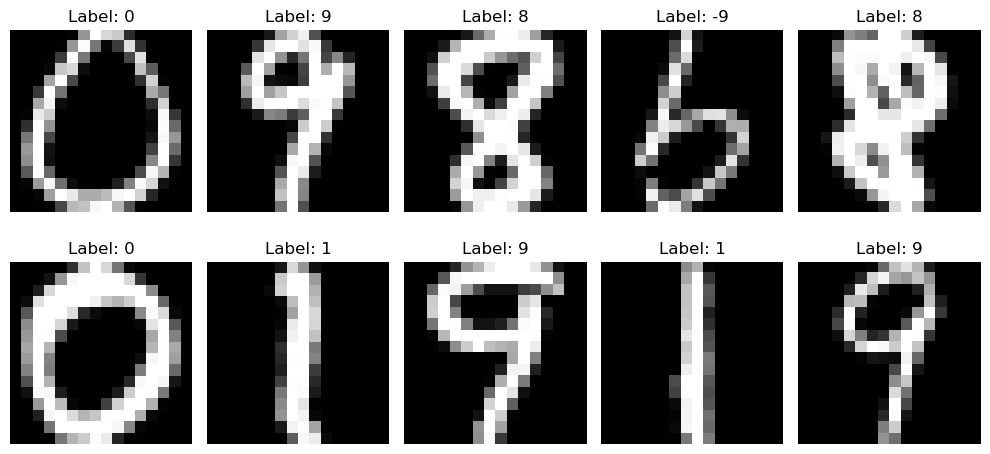

In [5]:
# Separate the label (first column) and the image pixels (remaining columns)
labels = MNIST.iloc[:, 0].astype(int).values
images = MNIST.iloc[:, 1:].values

img_dim = int(np.sqrt(images.shape[1]))
# Plot some images (for example, the first 10)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    # Reshape the flat image into 16x16
    img = images[i].reshape(img_dim, img_dim)
    # Show the image. Using cmap='gray' for better visualization.
    ax.imshow(img, cmap='gray', interpolation='nearest')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
catdog = pd.read_csv('catdogdata.txt', sep=' ').values

In [7]:
labels_cd = np.zeros(catdog.shape[0])
labels_cd[99:] = 1  # 0 for cats, 1 for dogs

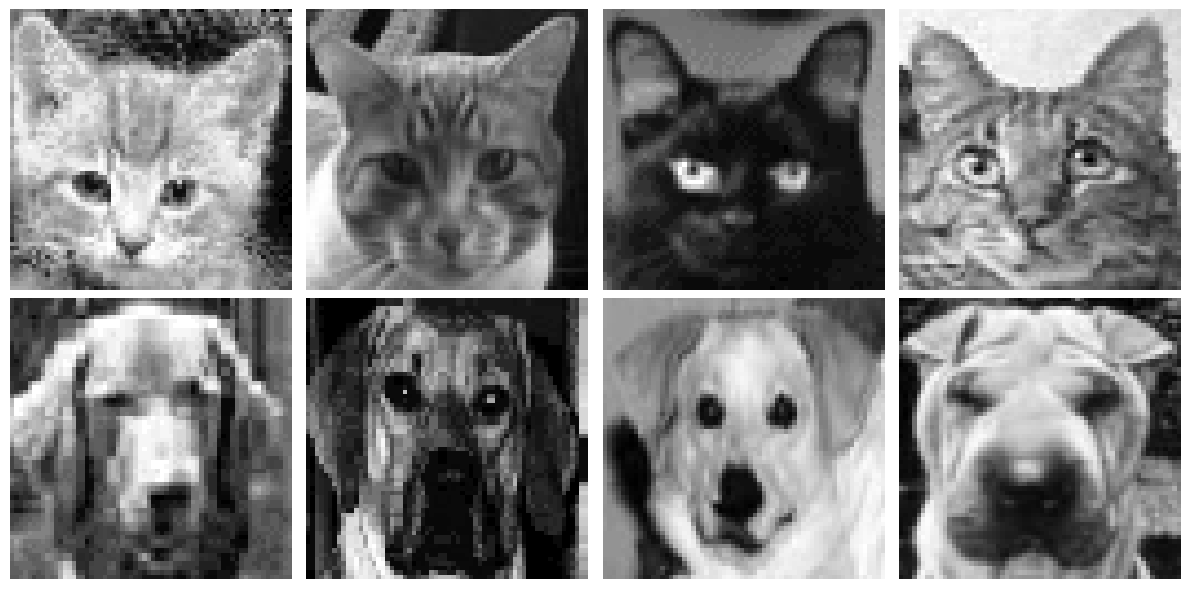

In [8]:
def rotateM(img):
   return np.rot90(img, k=-1)

np.random.seed(0)

ssc = np.random.choice(np.where(labels_cd == 0)[0], 4, replace=False)
ssd = np.random.choice(np.where(labels_cd == 1)[0], 4, replace=False)

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

for i , idx in enumerate([ssc[0], ssc[1], ssc[2], ssc[3], ssd[0], ssd[1], ssd[2], ssd[3]]):
   img = catdog[idx].reshape(64, 64)
   img = rotateM(img)
   ax = axs[i // 4, i % 4]
   ax.imshow(img, cmap='gray')
   ax.axis('off') 

plt.tight_layout()
plt.show()

In [28]:
labels_cd.shape

(198,)

### Part 1

#### MNIST: F-test and Lasso


==================== RUN 1/3 ====================

=== ANOVA Feature Selection ===
k=100: CV Balanced Accuracy = 0.8987
k=120: CV Balanced Accuracy = 0.9001
k=140: CV Balanced Accuracy = 0.9090
k=160: CV Balanced Accuracy = 0.9105
k=180: CV Balanced Accuracy = 0.9123
k=200: CV Balanced Accuracy = 0.9112
k=220: CV Balanced Accuracy = 0.9100
k=240: CV Balanced Accuracy = 0.9122
Best k is: 180


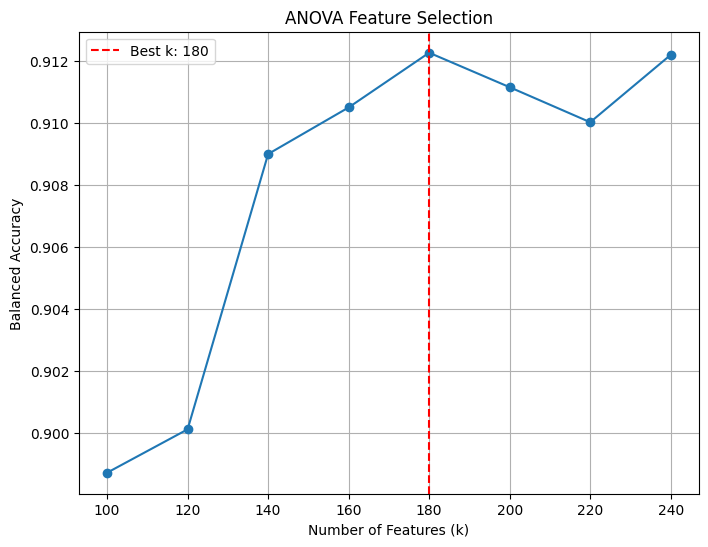


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9050
  Balanced Accuracy = 0.8962


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8825
  Balanced Accuracy = 0.8689
Random Forest:
  Accuracy = 0.9100
  Balanced Accuracy = 0.9025

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9175
  Balanced Accuracy = 0.9091


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8950
  Balanced Accuracy = 0.8835
Random Forest:
  Accuracy = 0.9200
  Balanced Accuracy = 0.9108

==================== RUN 2/3 ====================

=== ANOVA Feature Selection ===
k=100: CV Balanced Accuracy = 0.8941
k=120: CV Balanced Accuracy = 0.8971
k=140: CV Balanced Accuracy = 0.9026
k=160: CV Balanced Accuracy = 0.9064
k=180: CV Balanced Accuracy = 0.9064
k=200: CV Balanced Accuracy = 0.9103
k=220: CV Balanced Accuracy = 0.9101
k=240: CV Balanced Accuracy = 0.9102
Best k is: 200


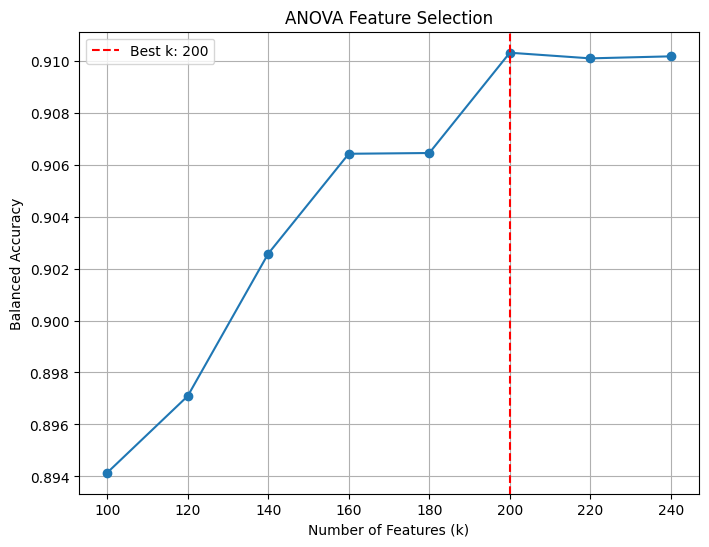


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9150
  Balanced Accuracy = 0.9079


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9275
  Balanced Accuracy = 0.9194
Random Forest:
  Accuracy = 0.9225
  Balanced Accuracy = 0.9148

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9200
  Balanced Accuracy = 0.9142


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9075
  Balanced Accuracy = 0.8959
Random Forest:
  Accuracy = 0.9350
  Balanced Accuracy = 0.9285

==================== RUN 3/3 ====================

=== ANOVA Feature Selection ===
k=100: CV Balanced Accuracy = 0.8901
k=120: CV Balanced Accuracy = 0.8995
k=140: CV Balanced Accuracy = 0.8978
k=160: CV Balanced Accuracy = 0.9015
k=180: CV Balanced Accuracy = 0.9028
k=200: CV Balanced Accuracy = 0.9024
k=220: CV Balanced Accuracy = 0.9031
k=240: CV Balanced Accuracy = 0.9057
Best k is: 240


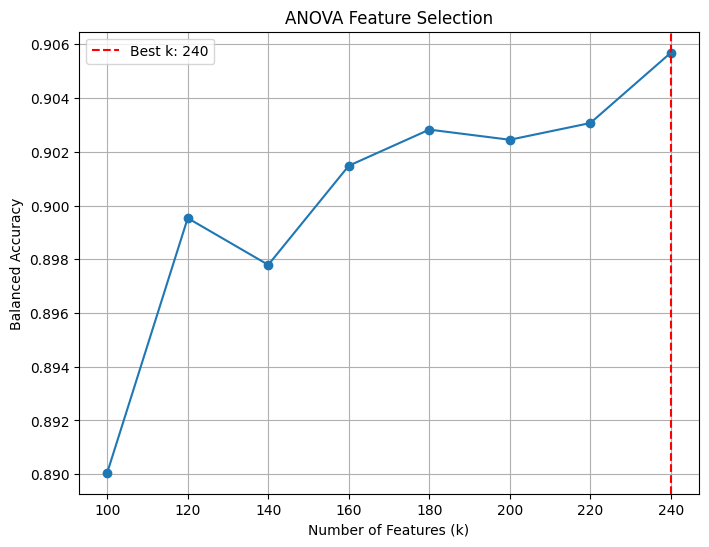


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9125
  Balanced Accuracy = 0.9028


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8925
  Balanced Accuracy = 0.8802
Random Forest:
  Accuracy = 0.9300
  Balanced Accuracy = 0.9220

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9175
  Balanced Accuracy = 0.9075


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8900
  Balanced Accuracy = 0.8787
Random Forest:
  Accuracy = 0.9400
  Balanced Accuracy = 0.9327

=== Feature Selection Heatmaps ===


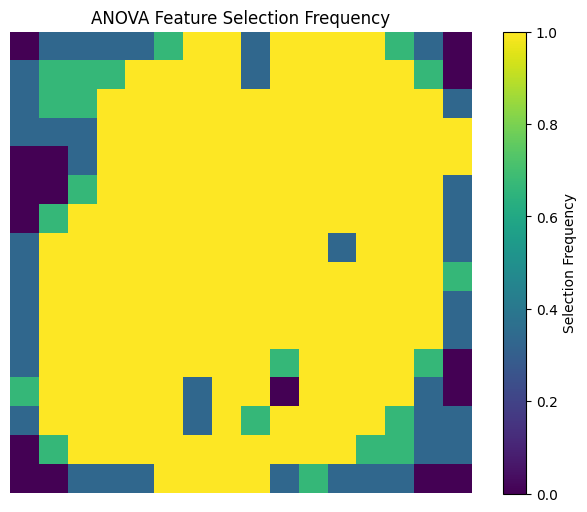

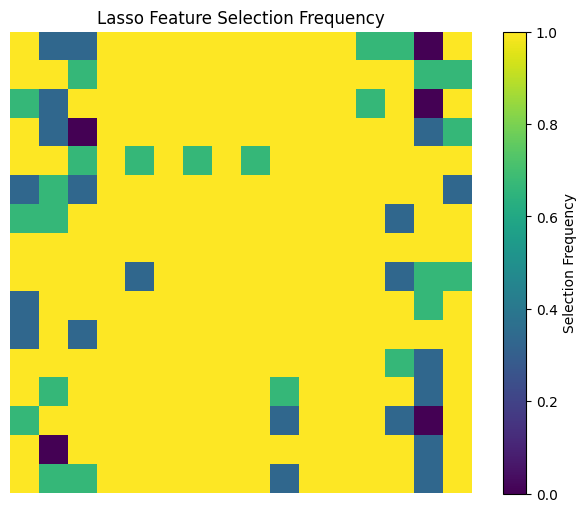

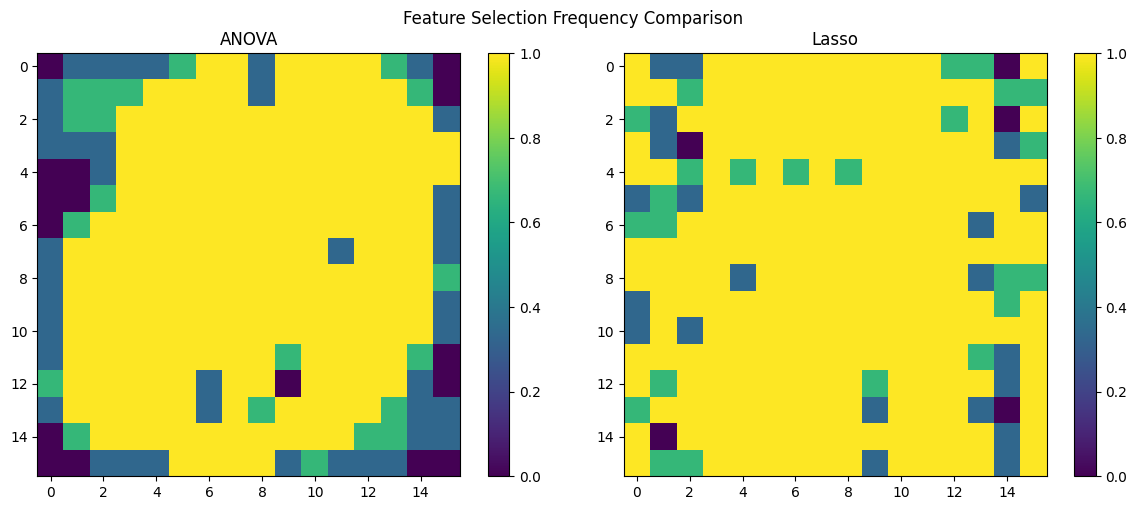


=== Performance Summary ===

Classifier: Logistic Regression

Method: ANOVA
  Avg best k: 206.7
  Accuracy: 0.9108 ± 0.0042
  Balanced Accuracy: 0.9023 ± 0.0048

Method: Lasso
  Avg best C: 0.4642
  Avg features: 229.0
  Accuracy: 0.9183 ± 0.0012
  Balanced Accuracy: 0.9102 ± 0.0029

Classifier: SVM

Method: ANOVA
  Avg best k: 206.7
  Accuracy: 0.9008 ± 0.0193
  Balanced Accuracy: 0.8895 ± 0.0216

Method: Lasso
  Avg best C: 0.4642
  Avg features: 229.0
  Accuracy: 0.8975 ± 0.0074
  Balanced Accuracy: 0.8860 ± 0.0072

Classifier: Random Forest

Method: ANOVA
  Avg best k: 206.7
  Accuracy: 0.9208 ± 0.0082
  Balanced Accuracy: 0.9131 ± 0.0080

Method: Lasso
  Avg best C: 0.4642
  Avg features: 229.0
  Accuracy: 0.9317 ± 0.0085
  Balanced Accuracy: 0.9240 ± 0.0095


In [22]:
# --- Configuration ---
N_RUNS = 3                   # Number of experimental runs
K_VALUES = np.arange(100, 256, 20)    # Values of k to test for ANOVA
TEST_SIZE = 0.2              # Test set size
IMG_SHAPE = (16, 16)         # Assuming 16x16 images (256 features)

# --- Classifiers ---
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# --- Feature Selection Frequency Tracking ---
feature_selection_freq = {
    'ANOVA': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1]),  # Global tracking
    'Lasso': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1])
}

# --- Classifier Performance Results ---
results = defaultdict(lambda: {
    'ANOVA': {
        'best_k': [],
        'test_accuracies': [],
        'test_balanced_accuracy': []
    },
    'Lasso': {
        'best_C': [],
        'num_features': [],
        'test_accuracies': [],
        'test_balanced_accuracy': []
    }
})

# --- Main Experiment ---
for run in range(N_RUNS):
    print(f"\n{'='*20} RUN {run+1}/{N_RUNS} {'='*20}")
    random_state = run * 42
    
    # Data splitting
    X_train, X_test, y_train, y_test = train_test_split(
        images, labels, test_size=TEST_SIZE, 
        random_state=random_state, stratify=labels)
    
    # Pipeline: Feature scaling and selection
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('selector', SelectKBest(f_classif)),
        ('clf', LogisticRegression(solver='liblinear', max_iter=500))
    ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # === ANOVA Feature Selection ===
    print("\n=== ANOVA Feature Selection ===")
    cv_scores = []
    param_grid = {'selector__k': K_VALUES}

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy')
    grid_search.fit(X_train, y_train)

    cv_scores = grid_search.cv_results_['mean_test_score']

    for k, score in zip(K_VALUES, cv_scores):
        print(f"k={k}: CV Balanced Accuracy = {score:.4f}")

    best_k = grid_search.best_params_['selector__k']
    print(f"Best k is: {best_k}")
    best_selector = SelectKBest(score_func=f_classif, k=best_k)
    X_train_selected = best_selector.fit_transform(X_train, y_train)
    X_test_selected = best_selector.transform(X_test)
    selected_indices = best_selector.get_support(indices=True)
    
    # Update ANOVA feature frequency globally
    feature_selection_freq['ANOVA'][selected_indices] += 1/N_RUNS

    plt.figure(figsize=(8, 6))
    plt.plot(K_VALUES, cv_scores, marker='o')
    plt.title("ANOVA Feature Selection")
    plt.xlabel("Number of Features (k)")
    plt.ylabel("Balanced Accuracy")
    plt.xticks(K_VALUES)
    plt.grid()
    plt.axvline(x=best_k, color='r', linestyle='--', label=f"Best k: {best_k}")
    plt.legend()
    plt.show()
    
    # === Lasso Feature Selection ===
    print("\n=== Lasso Feature Selection ===")
    lasso_pipeline = Pipeline([
        ('classifier', LogisticRegression(
            penalty='l1', solver='liblinear', 
            max_iter=200, random_state=random_state))
    ])
    grid_search = GridSearchCV(
        lasso_pipeline, 
        {'classifier__C': np.logspace(-3, 1, 7)}, 
        cv=cv, 
        scoring='balanced_accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    best_C = grid_search.best_params_['classifier__C']
    best_lasso = grid_search.best_estimator_.named_steps['classifier']
    selected_indices = np.where(np.abs(best_lasso.coef_).sum(axis=0) > 1e-6)[0]
    num_selected = len(selected_indices)
    
    # Update Lasso feature frequency globally
    feature_selection_freq['Lasso'][selected_indices] += 1/N_RUNS
    
    # === Classifier Evaluation ===
    for method in ['ANOVA', 'Lasso']:
        print(f"\n--- {method} Selected Features ---")
        if method == 'ANOVA':
            X_train_sel = X_train_selected
            X_test_sel = X_test_selected
        else:
            X_train_sel = X_train[:, selected_indices]
            X_test_sel = X_test[:, selected_indices]
        
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_sel, y_train)
            y_pred = clf.predict(X_test_sel)
            
            results[clf_name][method]['test_accuracies'].append(
                accuracy_score(y_test, y_pred))
            results[clf_name][method]['test_balanced_accuracy'].append(
                balanced_accuracy_score(y_test, y_pred))
            
            if method == 'ANOVA':
                results[clf_name][method]['best_k'].append(best_k)
            else:
                results[clf_name][method]['best_C'].append(best_C)
                results[clf_name][method]['num_features'].append(num_selected)
            
            print(f"{clf_name}:")
            print(f"  Accuracy = {accuracy_score(y_test, y_pred):.4f}")
            print(f"  Balanced Accuracy = {balanced_accuracy_score(y_test, y_pred):.4f}")

# === Visualizations ===
def plot_feature_heatmap(freq_array, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(freq_array.reshape(IMG_SHAPE), 
               cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Selection Frequency')
    plt.title(title)
    plt.axis('off')
    plt.show()

print("\n=== Feature Selection Heatmaps ===")
plot_feature_heatmap(feature_selection_freq['ANOVA'], "ANOVA Feature Selection Frequency")
plot_feature_heatmap(feature_selection_freq['Lasso'], "Lasso Feature Selection Frequency")

# Side-by-side comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(feature_selection_freq['ANOVA'].reshape(IMG_SHAPE),
           cmap='viridis', interpolation='nearest')
plt.title("ANOVA")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(feature_selection_freq['Lasso'].reshape(IMG_SHAPE),
           cmap='viridis', interpolation='nearest')
plt.title("Lasso")
plt.colorbar()
plt.suptitle("Feature Selection Frequency Comparison")
plt.tight_layout()
plt.show()

# === Performance Summary ===
print("\n=== Performance Summary ===")
for clf_name in classifiers:
    print(f"\nClassifier: {clf_name}")
    for method in ['ANOVA', 'Lasso']:
        print(f"\nMethod: {method}")
        if method == 'ANOVA':
            print(f"  Avg best k: {np.mean(results[clf_name][method]['best_k']):.1f}")
        else:
            print(f"  Avg best C: {np.mean(results[clf_name][method]['best_C']):.4f}")
            print(f"  Avg features: {np.mean(results[clf_name][method]['num_features']):.1f}")
        
        print(f"  Accuracy: {np.mean(results[clf_name][method]['test_accuracies']):.4f} ± {np.std(results[clf_name][method]['test_accuracies']):.4f}")
        print(f"  Balanced Accuracy: {np.mean(results[clf_name][method]['test_balanced_accuracy']):.4f} ± {np.std(results[clf_name][method]['test_balanced_accuracy']):.4f}")

#### CatDogs: F-test and Lasso


==================== RUN 1/3 ====================

=== ANOVA Feature Selection ===
k=1500: CV Balanced Accuracy = 0.7913
k=1600: CV Balanced Accuracy = 0.7971
k=1700: CV Balanced Accuracy = 0.8033
k=1800: CV Balanced Accuracy = 0.8033
k=1900: CV Balanced Accuracy = 0.8162
k=2000: CV Balanced Accuracy = 0.8162
k=2100: CV Balanced Accuracy = 0.8100
k=2200: CV Balanced Accuracy = 0.8037
k=2300: CV Balanced Accuracy = 0.8037
k=2400: CV Balanced Accuracy = 0.7975
k=2500: CV Balanced Accuracy = 0.8037
k=2600: CV Balanced Accuracy = 0.8037
k=2700: CV Balanced Accuracy = 0.7975
k=2800: CV Balanced Accuracy = 0.7913
k=2900: CV Balanced Accuracy = 0.7979
k=3000: CV Balanced Accuracy = 0.8042
k=3100: CV Balanced Accuracy = 0.8104
k=3200: CV Balanced Accuracy = 0.8038
k=3300: CV Balanced Accuracy = 0.8100
k=3400: CV Balanced Accuracy = 0.8100
k=3500: CV Balanced Accuracy = 0.8163
k=3600: CV Balanced Accuracy = 0.8163
k=3700: CV Balanced Accuracy = 0.8100
k=3800: CV Balanced Accuracy = 0.8100
k=39

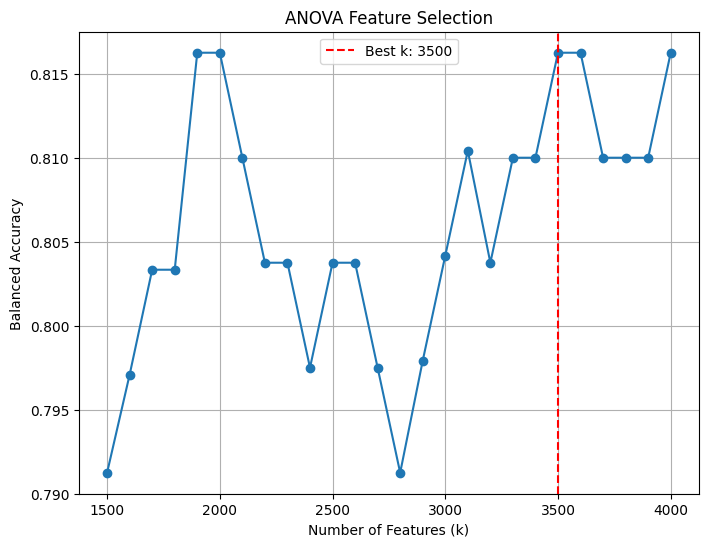


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7750


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9000
  Balanced Accuracy = 0.9000
Random Forest:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.9000
  Balanced Accuracy = 0.9000

==================== RUN 2/3 ====================

=== ANOVA Feature Selection ===
k=1500: CV Balanced Accuracy = 0.8471
k=1600: CV Balanced Accuracy = 0.8596
k=1700: CV Balanced Accuracy = 0.8467
k=1800: CV Balanced Accuracy = 0.8408
k=1900: CV Balanced Accuracy = 0.8408
k=2000: CV Balanced Accuracy = 0.8408
k=2100: CV Balanced Accuracy = 0.8346
k=2200: CV Balanced Accuracy = 0.8408
k=2300: CV Balanced Accuracy = 0.8404
k=2400: CV Balanced Accuracy = 0.8408
k=2500: CV Balanced Accuracy = 0.8408
k=2600: CV Balanced Accuracy = 0.8408
k=2700: CV Balanced Accuracy = 0.8408
k=2800: CV Balanced Accuracy = 0.8408
k=2900: CV Balanced Accuracy = 0.8408
k=3000: CV Balanced Accuracy = 0.8408
k=3100: CV Balanced Accuracy = 0.8471
k=3200: CV Balanced Accuracy = 0.8471
k=3300: CV Balanced Accuracy = 0.8408
k=3400: CV Balanced Accuracy = 0.8471
k=3500: CV Balanced Accuracy = 0.8538
k=3600: CV Balanced Accuracy = 0.8538
k=3700: CV Balan

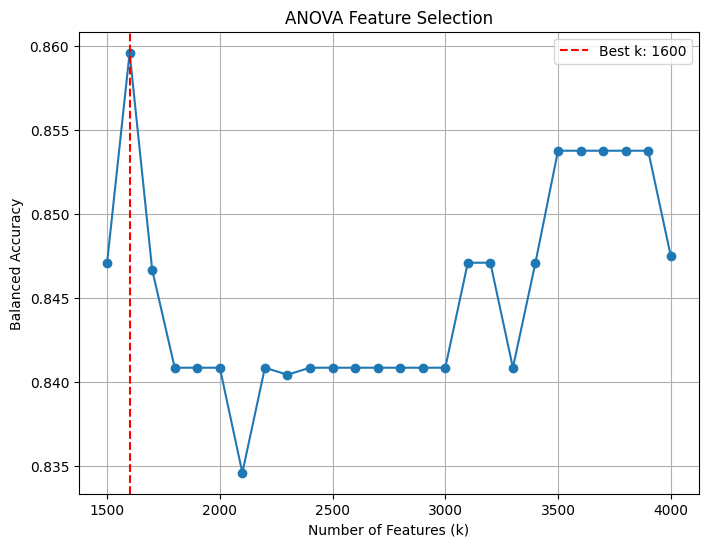


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7750
Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000
SVM:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7750


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7750

==================== RUN 3/3 ====================

=== ANOVA Feature Selection ===
k=1500: CV Balanced Accuracy = 0.8167
k=1600: CV Balanced Accuracy = 0.8229
k=1700: CV Balanced Accuracy = 0.8292
k=1800: CV Balanced Accuracy = 0.8354
k=1900: CV Balanced Accuracy = 0.8350
k=2000: CV Balanced Accuracy = 0.8350
k=2100: CV Balanced Accuracy = 0.8417
k=2200: CV Balanced Accuracy = 0.8417
k=2300: CV Balanced Accuracy = 0.8417
k=2400: CV Balanced Accuracy = 0.8354
k=2500: CV Balanced Accuracy = 0.8292
k=2600: CV Balanced Accuracy = 0.8292
k=2700: CV Balanced Accuracy = 0.8354
k=2800: CV Balanced Accuracy = 0.8479
k=2900: CV Balanced Accuracy = 0.8354
k=3000: CV Balanced Accuracy = 0.8354
k=3100: CV Balanced Accuracy = 0.8354
k=3200: CV Balanced Accuracy = 0.8354
k=3300: CV Balanced Accuracy = 0.8350
k=3400: CV Balanced Accuracy = 0.8412
k=3500: CV Balanced Accuracy = 0.8412
k=3600: CV Balanced Accuracy = 0.8412
k=3700: CV Balan

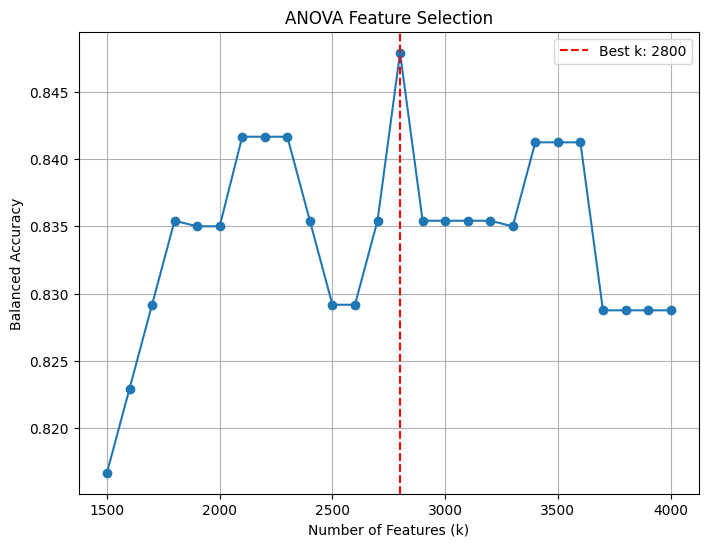


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500
Random Forest:
  Accuracy = 0.7250
  Balanced Accuracy = 0.7250

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8250
  Balanced Accuracy = 0.8250
SVM:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500


e:\SOFTWARE\Python\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

=== Feature Selection Heatmaps ===


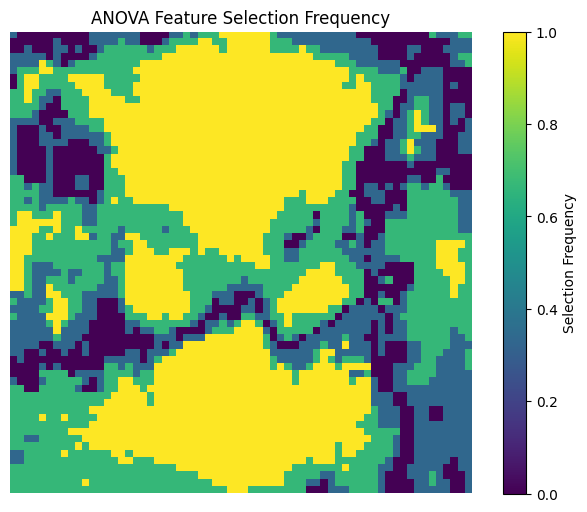

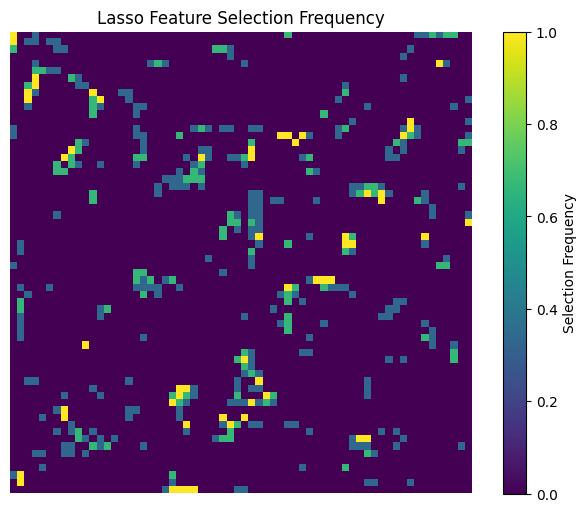

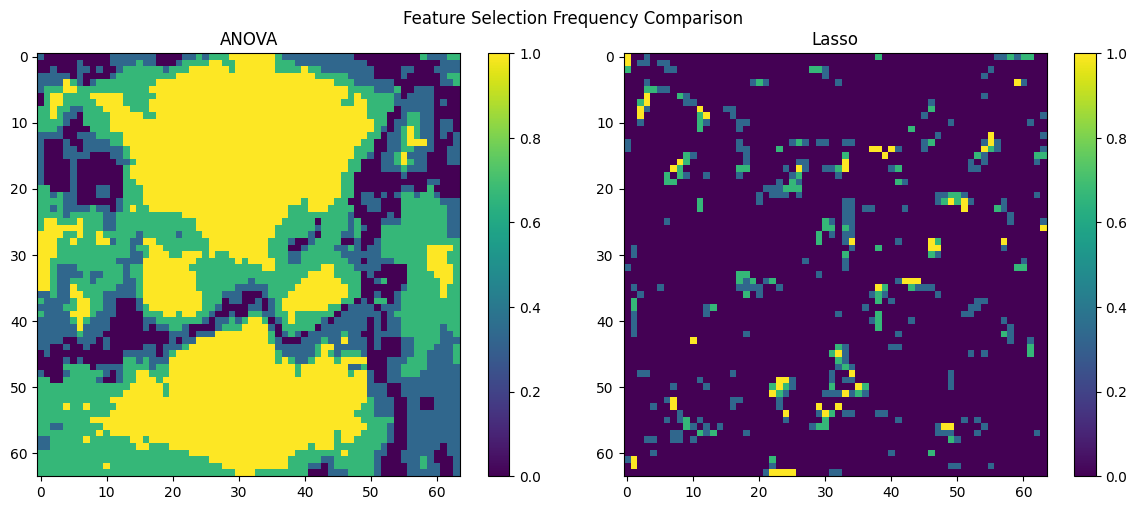


=== Performance Summary ===

Classifier: Logistic Regression

Method: ANOVA
  Avg best k: 2633.3
  Accuracy: 0.7917 ± 0.0425
  Balanced Accuracy: 0.7917 ± 0.0425

Method: Lasso
  Avg best C: 0.1000
  Avg features: 209.7
  Accuracy: 0.8333 ± 0.0312
  Balanced Accuracy: 0.8333 ± 0.0312

Classifier: SVM

Method: ANOVA
  Avg best k: 2633.3
  Accuracy: 0.8417 ± 0.0514
  Balanced Accuracy: 0.8417 ± 0.0514

Method: Lasso
  Avg best C: 0.1000
  Avg features: 209.7
  Accuracy: 0.8333 ± 0.0425
  Balanced Accuracy: 0.8333 ± 0.0425

Classifier: Random Forest

Method: ANOVA
  Avg best k: 2633.3
  Accuracy: 0.7750 ± 0.0540
  Balanced Accuracy: 0.7750 ± 0.0540

Method: Lasso
  Avg best C: 0.1000
  Avg features: 209.7
  Accuracy: 0.8083 ± 0.0656
  Balanced Accuracy: 0.8083 ± 0.0656


In [27]:
# --- Configuration ---
N_RUNS = 3                   # Number of experimental runs
K_VALUES = np.arange(1500, 4096, 100)    # Values of k to test for ANOVA
TEST_SIZE = 0.2              # Test set size
IMG_SHAPE = (64, 64)         
# --- Classifiers ---
classifiers = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=200),
    "SVM": LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# --- Feature Selection Frequency Tracking ---
feature_selection_freq = {
    'ANOVA': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1]),  # Global tracking
    'Lasso': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1])
}

# --- Classifier Performance Results ---
results = defaultdict(lambda: {
    'ANOVA': {
        'best_k': [],
        'test_accuracies': [],
        'test_balanced_accuracy': []
    },
    'Lasso': {
        'best_C': [],
        'num_features': [],
        'test_accuracies': [],
        'test_balanced_accuracy': []
    }
})

# --- Main Experiment ---
for run in range(N_RUNS):
    print(f"\n{'='*20} RUN {run+1}/{N_RUNS} {'='*20}")
    random_state = run * 42
    
    # Data splitting
    X_train, X_test, y_train, y_test = train_test_split(
        catdog, labels_cd, test_size=TEST_SIZE, 
        random_state=random_state, stratify=labels_cd)
    
     # Pipeline: Feature scaling and selection
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('selector', SelectKBest(f_classif)),
        ('clf', LogisticRegression(solver='liblinear', max_iter=500))
    ])
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # === ANOVA Feature Selection ===
    print("\n=== ANOVA Feature Selection ===")
    cv_scores = []
    param_grid = {'selector__k': K_VALUES}

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy')
    grid_search.fit(X_train, y_train)

    cv_scores = grid_search.cv_results_['mean_test_score']

    for k, score in zip(K_VALUES, cv_scores):
        print(f"k={k}: CV Balanced Accuracy = {score:.4f}")

    best_k = grid_search.best_params_['selector__k']
    print(f"Best k is: {best_k}")
    best_selector = SelectKBest(score_func=f_classif, k=best_k)
    X_train_selected = best_selector.fit_transform(X_train, y_train)
    X_test_selected = best_selector.transform(X_test)
    selected_indices = best_selector.get_support(indices=True)
    
    # Update ANOVA feature frequency globally
    feature_selection_freq['ANOVA'][selected_indices] += 1/N_RUNS

    plt.figure(figsize=(8, 6))
    plt.plot(K_VALUES, cv_scores, marker='o')
    plt.title("ANOVA Feature Selection")
    plt.xlabel("Number of Features (k)")
    plt.ylabel("Balanced Accuracy")
    plt.grid()
    plt.axvline(x=best_k, color='r', linestyle='--', label=f"Best k: {best_k}")
    plt.legend()
    plt.show()
    
    # === Lasso Feature Selection ===
    print("\n=== Lasso Feature Selection ===")
    lasso_pipeline = Pipeline([
        ('classifier', LogisticRegression(
            penalty='l1', solver='liblinear', 
            max_iter=200, random_state=random_state))
    ])
    grid_search = GridSearchCV(
        lasso_pipeline, 
        {'classifier__C': np.logspace(-3, 1, 7)}, 
        cv=cv, 
        scoring='balanced_accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    best_C = grid_search.best_params_['classifier__C']
    best_lasso = grid_search.best_estimator_.named_steps['classifier']
    selected_indices = np.where(np.abs(best_lasso.coef_).sum(axis=0) > 1e-6)[0]
    num_selected = len(selected_indices)
    
    # Update Lasso feature frequency globally
    feature_selection_freq['Lasso'][selected_indices] += 1/N_RUNS
    
    # === Classifier Evaluation ===
    for method in ['ANOVA', 'Lasso']:
        print(f"\n--- {method} Selected Features ---")
        if method == 'ANOVA':
            X_train_sel = X_train_selected
            X_test_sel = X_test_selected
        else:
            X_train_sel = X_train[:, selected_indices]
            X_test_sel = X_test[:, selected_indices]
        
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_sel, y_train)
            y_pred = clf.predict(X_test_sel)
            
            results[clf_name][method]['test_accuracies'].append(
                accuracy_score(y_test, y_pred))
            results[clf_name][method]['test_balanced_accuracy'].append(
                balanced_accuracy_score(y_test, y_pred))
            
            if method == 'ANOVA':
                results[clf_name][method]['best_k'].append(best_k)
            else:
                results[clf_name][method]['best_C'].append(best_C)
                results[clf_name][method]['num_features'].append(num_selected)
            
            print(f"{clf_name}:")
            print(f"  Accuracy = {accuracy_score(y_test, y_pred):.4f}")
            print(f"  Balanced Accuracy = {balanced_accuracy_score(y_test, y_pred):.4f}")

# === Visualizations ===
def plot_feature_heatmap(freq_array, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(rotateM(freq_array.reshape(IMG_SHAPE)), 
               cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Selection Frequency')
    plt.title(title)
    plt.axis('off')
    plt.show()

print("\n=== Feature Selection Heatmaps ===")
plot_feature_heatmap(feature_selection_freq['ANOVA'], "ANOVA Feature Selection Frequency")
plot_feature_heatmap(feature_selection_freq['Lasso'], "Lasso Feature Selection Frequency")

# Side-by-side comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotateM(feature_selection_freq['ANOVA'].reshape(IMG_SHAPE)),
           cmap='viridis', interpolation='nearest')
plt.title("ANOVA")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(rotateM(feature_selection_freq['Lasso'].reshape(IMG_SHAPE)),
           cmap='viridis', interpolation='nearest')
plt.title("Lasso")
plt.colorbar()
plt.suptitle("Feature Selection Frequency Comparison")
plt.tight_layout()
plt.show()

# === Performance Summary ===
print("\n=== Performance Summary ===")
for clf_name in classifiers:
    print(f"\nClassifier: {clf_name}")
    for method in ['ANOVA', 'Lasso']:
        print(f"\nMethod: {method}")
        if method == 'ANOVA':
            print(f"  Avg best k: {np.mean(results[clf_name][method]['best_k']):.1f}")
        else:
            print(f"  Avg best C: {np.mean(results[clf_name][method]['best_C']):.4f}")
            print(f"  Avg features: {np.mean(results[clf_name][method]['num_features']):.1f}")
        
        print(f"  Accuracy: {np.mean(results[clf_name][method]['test_accuracies']):.4f} ± {np.std(results[clf_name][method]['test_accuracies']):.4f}")
        print(f"  Balanced Accuracy: {np.mean(results[clf_name][method]['test_balanced_accuracy']):.4f} ± {np.std(results[clf_name][method]['test_balanced_accuracy']):.4f}")

### Part 2: 80%, 50%, 20% sample size

#### MNIST


#################### SAMPLE SIZE: 0.8 ####################

==================== RUN 1/3 ====================

=== ANOVA Feature Selection ===


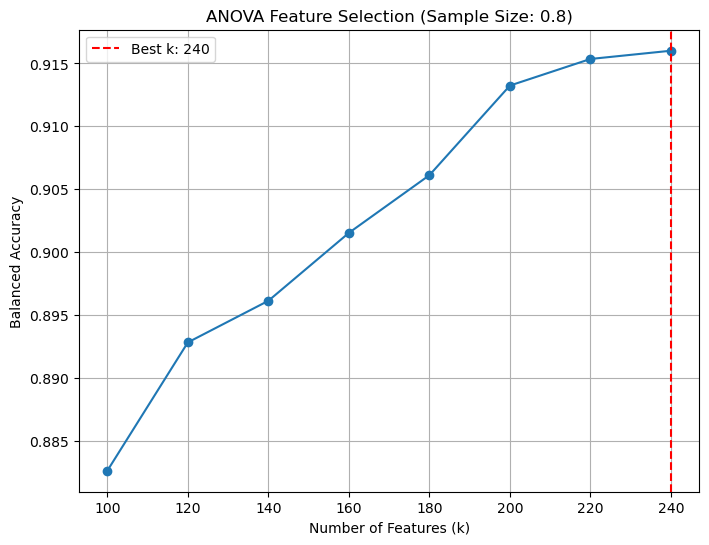


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9187
  Balanced Accuracy = 0.9071


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9031
  Balanced Accuracy = 0.8878
Random Forest:
  Accuracy = 0.9281
  Balanced Accuracy = 0.9164

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9219
  Balanced Accuracy = 0.9109


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8858
Random Forest:
  Accuracy = 0.9187
  Balanced Accuracy = 0.9057

==================== RUN 2/3 ====================

=== ANOVA Feature Selection ===


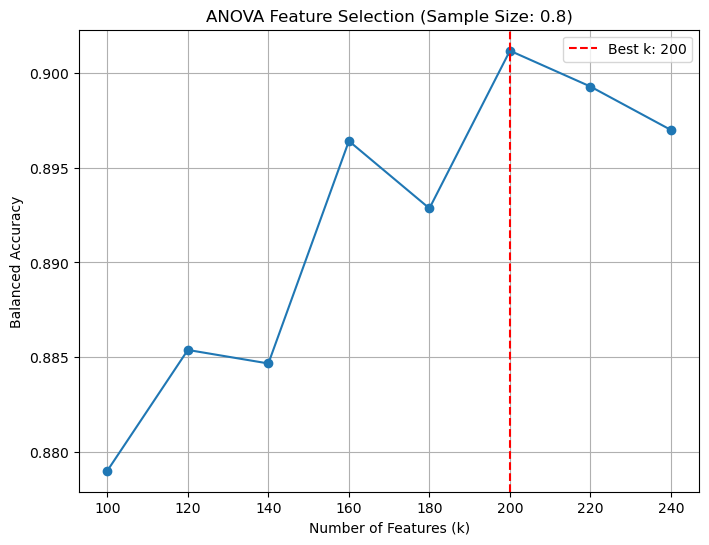


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9094
  Balanced Accuracy = 0.9032


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8906
  Balanced Accuracy = 0.8774
Random Forest:
  Accuracy = 0.9344
  Balanced Accuracy = 0.9274

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9062
  Balanced Accuracy = 0.8981


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8624
Random Forest:
  Accuracy = 0.9281
  Balanced Accuracy = 0.9208

==================== RUN 3/3 ====================

=== ANOVA Feature Selection ===


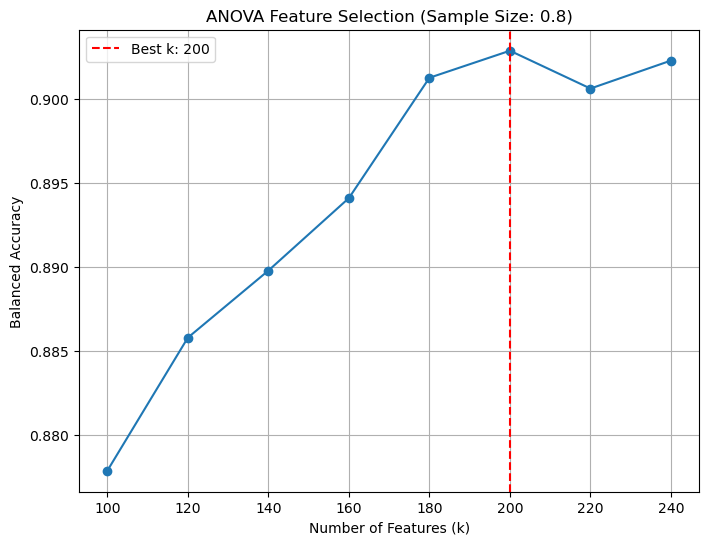


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9375
  Balanced Accuracy = 0.9313


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9250
  Balanced Accuracy = 0.9143
Random Forest:
  Accuracy = 0.9500
  Balanced Accuracy = 0.9422

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9313
  Balanced Accuracy = 0.9217


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9156
  Balanced Accuracy = 0.9015
Random Forest:
  Accuracy = 0.9531
  Balanced Accuracy = 0.9460

#################### SAMPLE SIZE: 0.5 ####################

==================== RUN 1/3 ====================

=== ANOVA Feature Selection ===


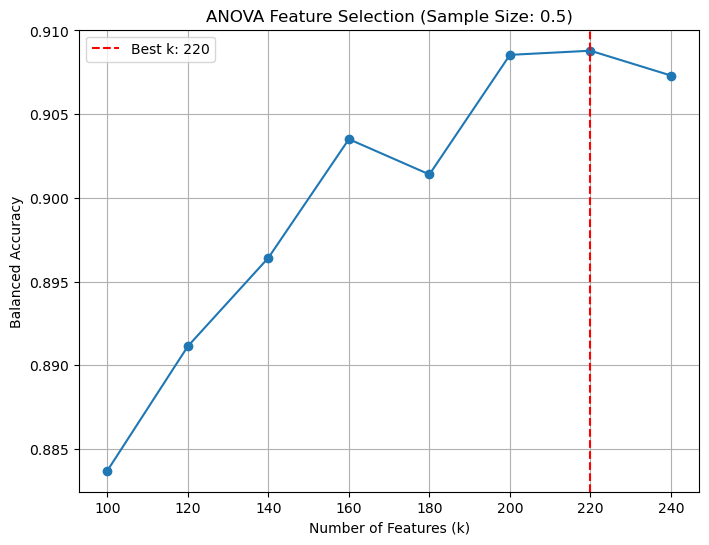


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8550
  Balanced Accuracy = 0.8350


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8450
  Balanced Accuracy = 0.8242
Random Forest:
  Accuracy = 0.9100
  Balanced Accuracy = 0.8962

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8550
  Balanced Accuracy = 0.8350


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8350
  Balanced Accuracy = 0.8150
Random Forest:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8839

==================== RUN 2/3 ====================

=== ANOVA Feature Selection ===


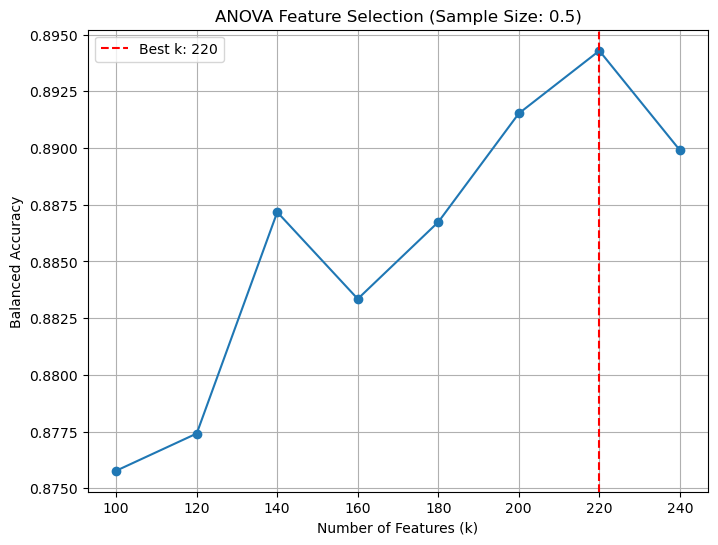


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8800
  Balanced Accuracy = 0.8711


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8450
  Balanced Accuracy = 0.8247
Random Forest:
  Accuracy = 0.9050
  Balanced Accuracy = 0.8951

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8850
  Balanced Accuracy = 0.8765


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8300
  Balanced Accuracy = 0.8042
Random Forest:
  Accuracy = 0.9200
  Balanced Accuracy = 0.9100

==================== RUN 3/3 ====================

=== ANOVA Feature Selection ===


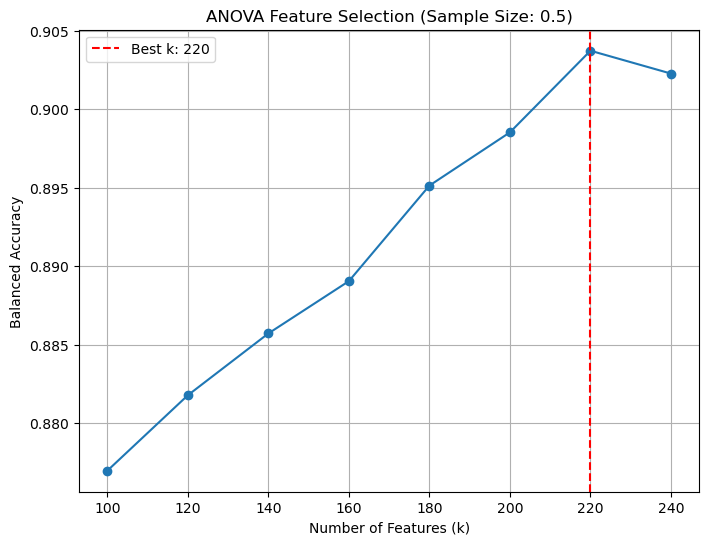


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8800
  Balanced Accuracy = 0.8701


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8450
  Balanced Accuracy = 0.8267
Random Forest:
  Accuracy = 0.9150
  Balanced Accuracy = 0.9067

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8800
  Balanced Accuracy = 0.8686


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8650
  Balanced Accuracy = 0.8470
Random Forest:
  Accuracy = 0.9150
  Balanced Accuracy = 0.9040

#################### SAMPLE SIZE: 0.2 ####################

==================== RUN 1/3 ====================

=== ANOVA Feature Selection ===


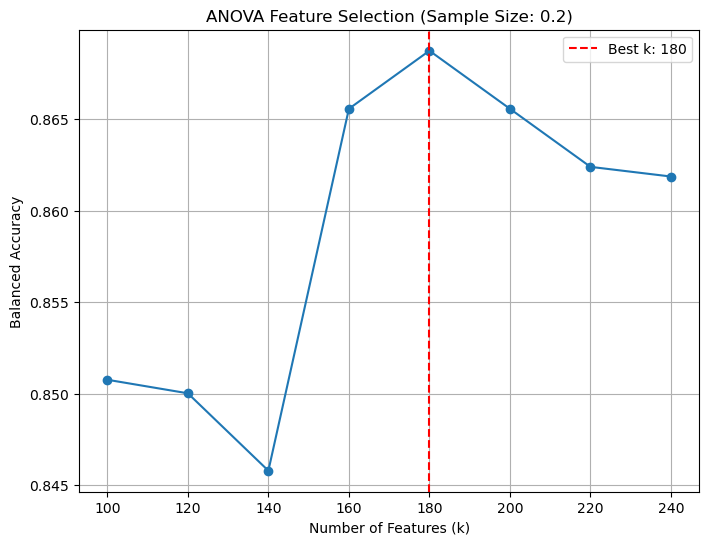


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8125
  Balanced Accuracy = 0.7983


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7625
  Balanced Accuracy = 0.7427
Random Forest:
  Accuracy = 0.7875
  Balanced Accuracy = 0.7630

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8000
  Balanced Accuracy = 0.7903


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7665
Random Forest:
  Accuracy = 0.8250
  Balanced Accuracy = 0.8086

==================== RUN 2/3 ====================

=== ANOVA Feature Selection ===


d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Softwares

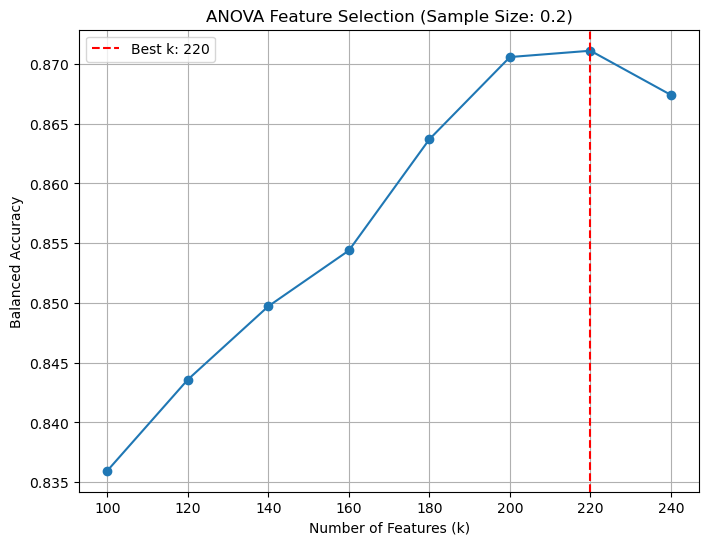


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9375
  Balanced Accuracy = 0.9405


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8959
Random Forest:
  Accuracy = 0.9125
  Balanced Accuracy = 0.9048

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9500
  Balanced Accuracy = 0.9484


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8959
Random Forest:
  Accuracy = 0.9500
  Balanced Accuracy = 0.9425

==================== RUN 3/3 ====================

=== ANOVA Feature Selection ===


d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
d:\Softwares\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [240] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\Softwares

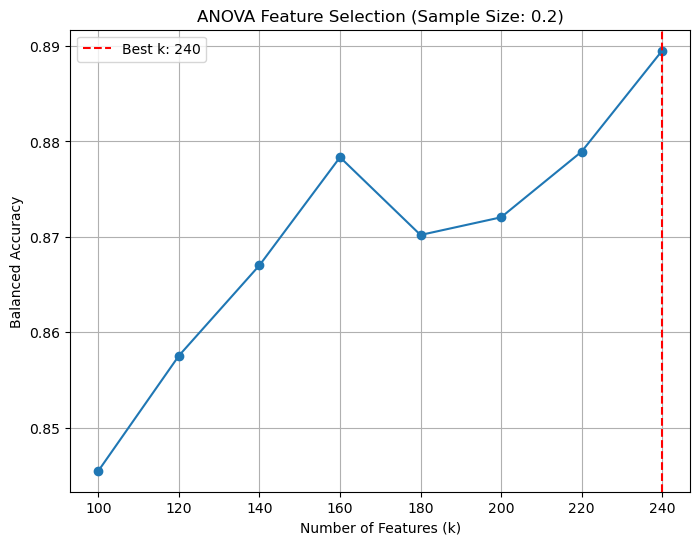


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8125
  Balanced Accuracy = 0.7824


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7750
  Balanced Accuracy = 0.7443
Random Forest:
  Accuracy = 0.9000
  Balanced Accuracy = 0.8825

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8000
  Balanced Accuracy = 0.7685


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8000
  Balanced Accuracy = 0.7760
Random Forest:
  Accuracy = 0.8875
  Balanced Accuracy = 0.8686

=== Feature Selection Heatmaps for Sample Size 0.8 ===


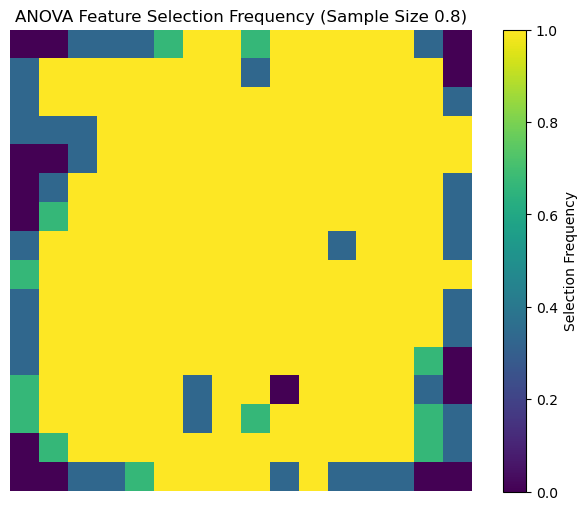

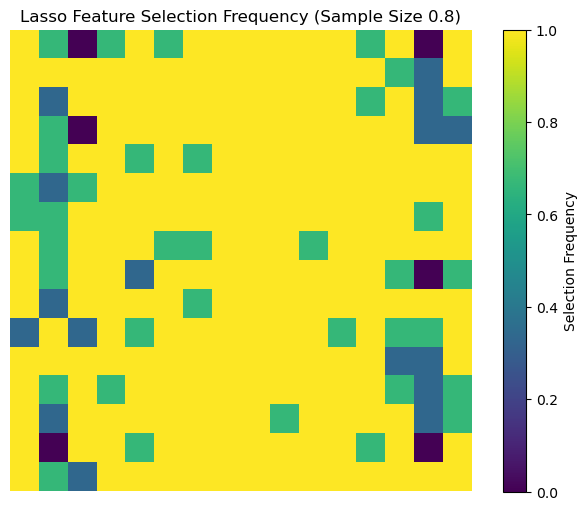

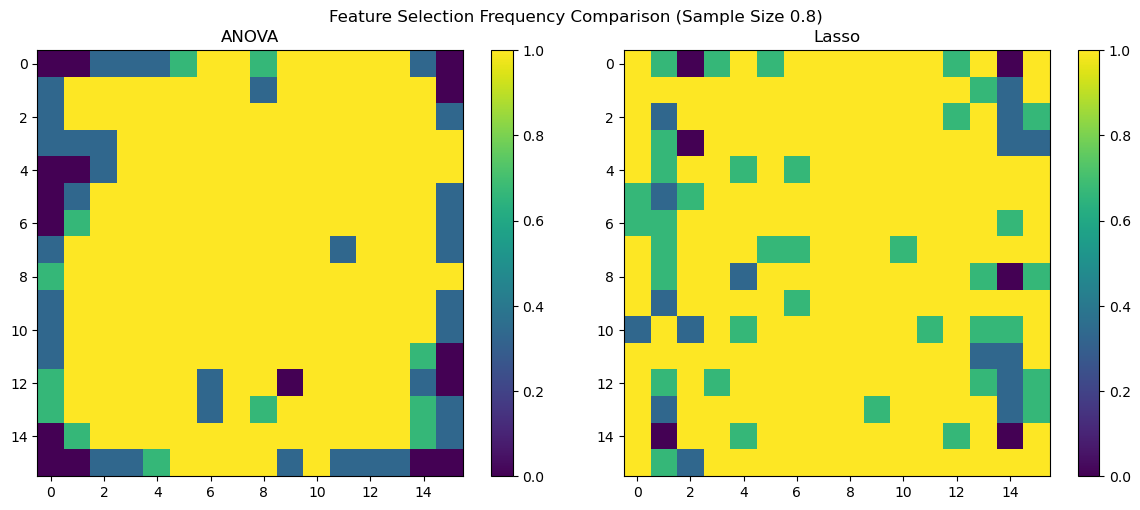


=== Feature Selection Heatmaps for Sample Size 0.5 ===


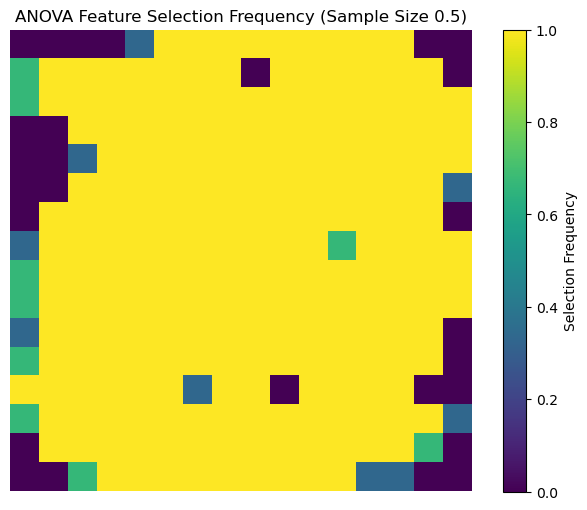

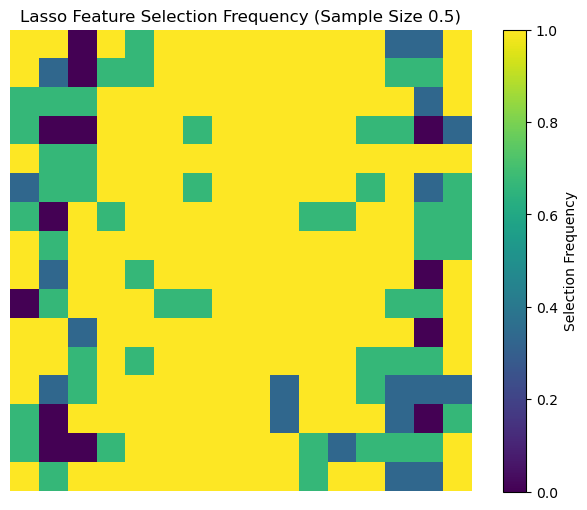

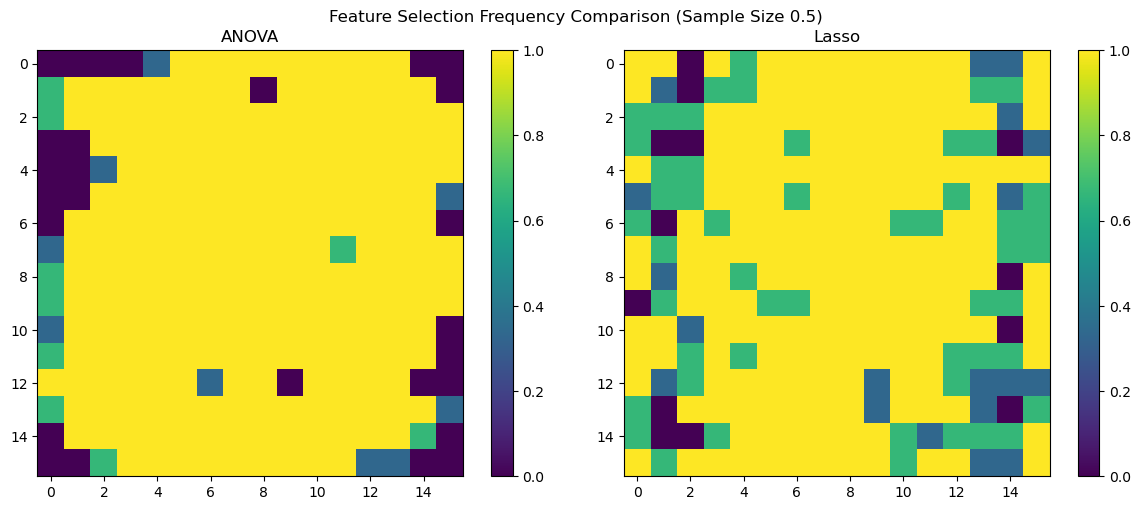


=== Feature Selection Heatmaps for Sample Size 0.2 ===


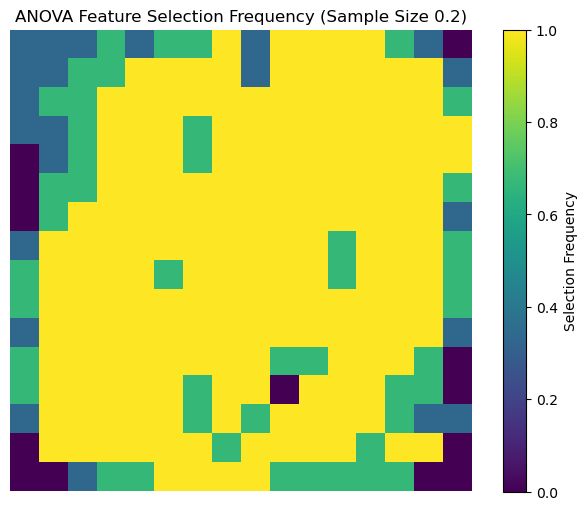

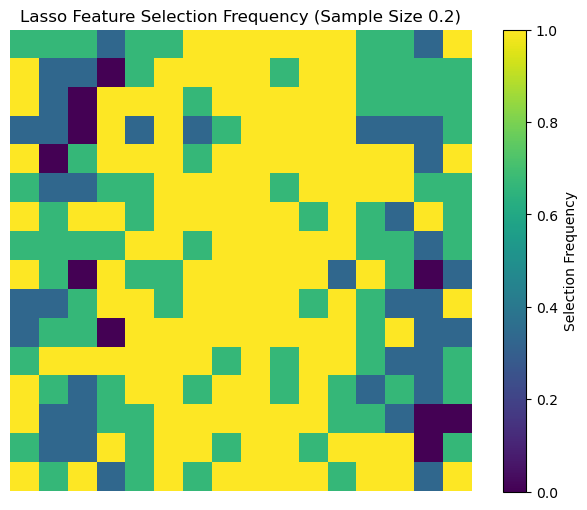

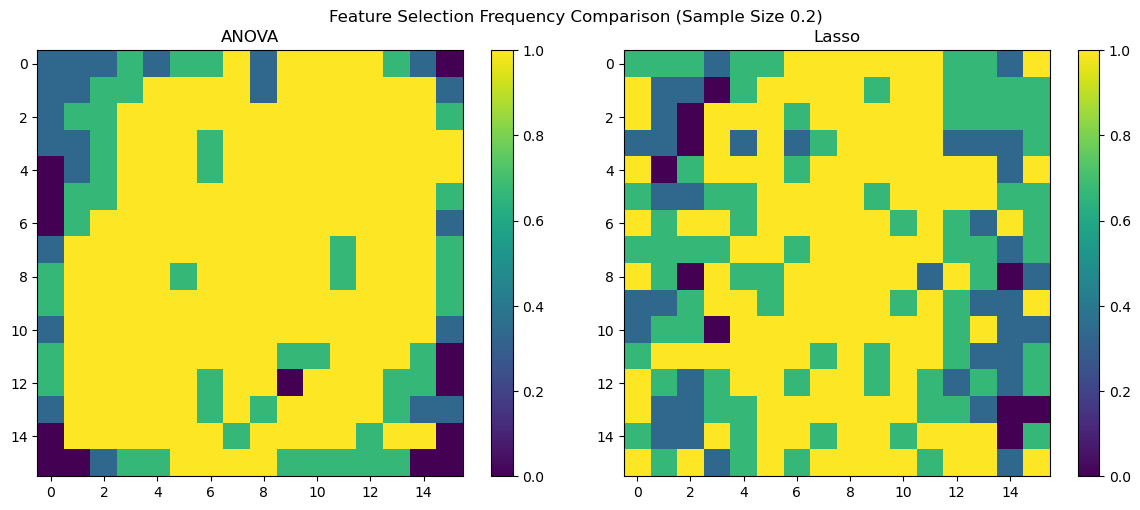


=== Performance Summary ===

----------------------------------------
Sample Size: 0.8
----------------------------------------

Classifier: Logistic Regression

Method: ANOVA
  Avg best k: 213.3
  Accuracy: 0.9219 ± 0.0117
  Balanced Accuracy: 0.9139 ± 0.0124

Method: Lasso
  Avg best C: 0.4642
  Avg features: 227.0
  Accuracy: 0.9198 ± 0.0103
  Balanced Accuracy: 0.9102 ± 0.0097

Classifier: SVM

Method: ANOVA
  Avg best k: 213.3
  Accuracy: 0.9062 ± 0.0142
  Balanced Accuracy: 0.8932 ± 0.0155

Method: Lasso
  Avg best C: 0.4642
  Avg features: 227.0
  Accuracy: 0.8969 ± 0.0167
  Balanced Accuracy: 0.8832 ± 0.0161

Classifier: Random Forest

Method: ANOVA
  Avg best k: 213.3
  Accuracy: 0.9375 ± 0.0092
  Balanced Accuracy: 0.9287 ± 0.0106

Method: Lasso
  Avg best C: 0.4642
  Avg features: 227.0
  Accuracy: 0.9333 ± 0.0145
  Balanced Accuracy: 0.9242 ± 0.0166

----------------------------------------
Sample Size: 0.5
----------------------------------------

Classifier: Logistic Reg

In [9]:
# --- Configuration ---
N_RUNS = 3                   # Number of experimental runs
K_VALUES = np.arange(100, 256, 20)    # Values of k to test for ANOVA
TEST_SIZE = 0.2              # Test set size
IMG_SHAPE = (16, 16)         # Assuming 16x16 images (256 features)
SAMPLE_SIZES = [0.8, 0.5, 0.2]  # Fractions of full dataset to test

# --- Classifiers ---
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# --- Feature Selection Frequency Tracking ---
feature_selection_freq = {
    sample_size: {
        'ANOVA': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1]),
        'Lasso': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1])
    }
    for sample_size in SAMPLE_SIZES
}

# --- Classifier Performance Results ---
results = {}
for clf_name in classifiers:
    results[clf_name] = {
        sample_size: {
            'ANOVA': {
                'best_k': [],
                'test_accuracies': [],
                'test_balanced_accuracy': []
            },
            'Lasso': {
                'best_C': [],
                'num_features': [],
                'test_accuracies': [],
                'test_balanced_accuracy': []
            }
        }
        for sample_size in SAMPLE_SIZES
    }

# --- Main Experiment ---
for sample_size in SAMPLE_SIZES:
    print(f"\n{'#'*20} SAMPLE SIZE: {sample_size} {'#'*20}")
    
    for run in range(N_RUNS):
        print(f"\n{'='*20} RUN {run+1}/{N_RUNS} {'='*20}")
        random_state = run * 42
        
        # Data splitting: first take a subset of the full dataset
        subset_images, _, subset_labels, _ = train_test_split(
            images, labels, 
            train_size=sample_size, 
            stratify=labels, 
            random_state=random_state)
        
        # Split subset into train and test
        X_train, X_test, y_train, y_test = train_test_split(
            subset_images, subset_labels, 
            test_size=TEST_SIZE, 
            random_state=random_state, 
            stratify=subset_labels)
        
        # Pipeline: Feature scaling and selection
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('selector', SelectKBest(f_classif)),
            ('clf', LogisticRegression(solver='liblinear', max_iter=500))
        ])
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

        # === ANOVA Feature Selection ===
        print("\n=== ANOVA Feature Selection ===")
        param_grid = {'selector__k': K_VALUES}
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy')
        grid_search.fit(X_train, y_train)
        
        best_k = grid_search.best_params_['selector__k']
        best_selector = SelectKBest(score_func=f_classif, k=best_k)
        X_train_selected = best_selector.fit_transform(X_train, y_train)
        X_test_selected = best_selector.transform(X_test)
        selected_indices = best_selector.get_support(indices=True)
        
        # Update ANOVA feature frequency
        feature_selection_freq[sample_size]['ANOVA'][selected_indices] += 1/N_RUNS

        # Plot ANOVA results
        plt.figure(figsize=(8, 6))
        plt.plot(K_VALUES, grid_search.cv_results_['mean_test_score'], marker='o')
        plt.title(f"ANOVA Feature Selection (Sample Size: {sample_size})")
        plt.xlabel("Number of Features (k)")
        plt.ylabel("Balanced Accuracy")
        plt.xticks(K_VALUES)
        plt.grid()
        plt.axvline(x=best_k, color='r', linestyle='--', label=f"Best k: {best_k}")
        plt.legend()
        plt.show()
        
        # === Lasso Feature Selection ===
        print("\n=== Lasso Feature Selection ===")
        lasso_pipeline = Pipeline([
            ('classifier', LogisticRegression(
                penalty='l1', solver='liblinear', 
                max_iter=200, random_state=random_state))
        ])
        grid_search = GridSearchCV(
            lasso_pipeline, 
            {'classifier__C': np.logspace(-3, 1, 7)}, 
            cv=cv, 
            scoring='balanced_accuracy',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        
        best_C = grid_search.best_params_['classifier__C']
        best_lasso = grid_search.best_estimator_.named_steps['classifier']
        selected_indices = np.where(np.abs(best_lasso.coef_).sum(axis=0) > 1e-6)[0]
        num_selected = len(selected_indices)
        
        # Update Lasso feature frequency
        feature_selection_freq[sample_size]['Lasso'][selected_indices] += 1/N_RUNS
        
        # === Classifier Evaluation ===
        for method in ['ANOVA', 'Lasso']:
            print(f"\n--- {method} Selected Features ---")
            if method == 'ANOVA':
                X_train_sel = X_train_selected
                X_test_sel = X_test_selected
            else:
                X_train_sel = X_train[:, selected_indices]
                X_test_sel = X_test[:, selected_indices]
            
            for clf_name, clf in classifiers.items():
                clf.fit(X_train_sel, y_train)
                y_pred = clf.predict(X_test_sel)
                
                results[clf_name][sample_size][method]['test_accuracies'].append(
                    accuracy_score(y_test, y_pred))
                results[clf_name][sample_size][method]['test_balanced_accuracy'].append(
                    balanced_accuracy_score(y_test, y_pred))
                
                if method == 'ANOVA':
                    results[clf_name][sample_size][method]['best_k'].append(best_k)
                else:
                    results[clf_name][sample_size][method]['best_C'].append(best_C)
                    results[clf_name][sample_size][method]['num_features'].append(num_selected)
                
                print(f"{clf_name}:")
                print(f"  Accuracy = {accuracy_score(y_test, y_pred):.4f}")
                print(f"  Balanced Accuracy = {balanced_accuracy_score(y_test, y_pred):.4f}")

# === Visualizations ===
def plot_feature_heatmap(freq_array, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(freq_array.reshape(IMG_SHAPE), 
               cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Selection Frequency')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Feature selection heatmaps for each sample size
for sample_size in SAMPLE_SIZES:
    print(f"\n=== Feature Selection Heatmaps for Sample Size {sample_size} ===")
    
    # Individual heatmaps
    plot_feature_heatmap(
        feature_selection_freq[sample_size]['ANOVA'], 
        f"ANOVA Feature Selection Frequency (Sample Size {sample_size})"
    )
    plot_feature_heatmap(
        feature_selection_freq[sample_size]['Lasso'], 
        f"Lasso Feature Selection Frequency (Sample Size {sample_size})"
    )
    
    # Side-by-side comparison
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(feature_selection_freq[sample_size]['ANOVA'].reshape(IMG_SHAPE),
               cmap='viridis', interpolation='nearest')
    plt.title("ANOVA")
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.imshow(feature_selection_freq[sample_size]['Lasso'].reshape(IMG_SHAPE),
               cmap='viridis', interpolation='nearest')
    plt.title("Lasso")
    plt.colorbar()
    plt.suptitle(f"Feature Selection Frequency Comparison (Sample Size {sample_size})")
    plt.tight_layout()
    plt.show()

# === Performance Summary ===
print("\n=== Performance Summary ===")
for sample_size in SAMPLE_SIZES:
    print(f"\n{'-'*40}\nSample Size: {sample_size}\n{'-'*40}")
    for clf_name in classifiers:
        print(f"\nClassifier: {clf_name}")
        for method in ['ANOVA', 'Lasso']:
            print(f"\nMethod: {method}")
            if method == 'ANOVA':
                print(f"  Avg best k: {np.mean(results[clf_name][sample_size][method]['best_k']):.1f}")
            else:
                print(f"  Avg best C: {np.mean(results[clf_name][sample_size][method]['best_C']):.4f}")
                print(f"  Avg features: {np.mean(results[clf_name][sample_size][method]['num_features']):.1f}")
            
            print(f"  Accuracy: {np.mean(results[clf_name][sample_size][method]['test_accuracies']):.4f} ± {np.std(results[clf_name][sample_size][method]['test_accuracies']):.4f}")
            print(f"  Balanced Accuracy: {np.mean(results[clf_name][sample_size][method]['test_balanced_accuracy']):.4f} ± {np.std(results[clf_name][sample_size][method]['test_balanced_accuracy']):.4f}")

#### CatDogs


#################### SAMPLE SIZE: 0.8 ####################

==================== RUN 1/3 ====================

=== ANOVA Feature Selection ===


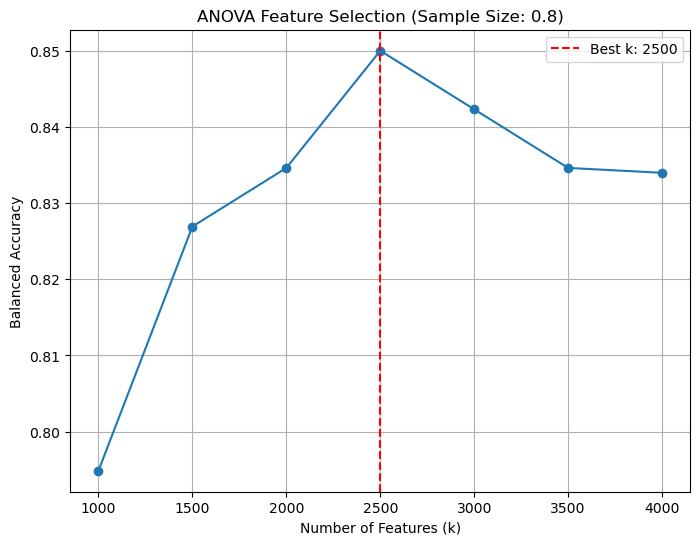


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8438
  Balanced Accuracy = 0.8438
Random Forest:
  Accuracy = 0.6875
  Balanced Accuracy = 0.6875

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7812
  Balanced Accuracy = 0.7812
SVM:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.7188
  Balanced Accuracy = 0.7188

==================== RUN 2/3 ====================

=== ANOVA Feature Selection ===


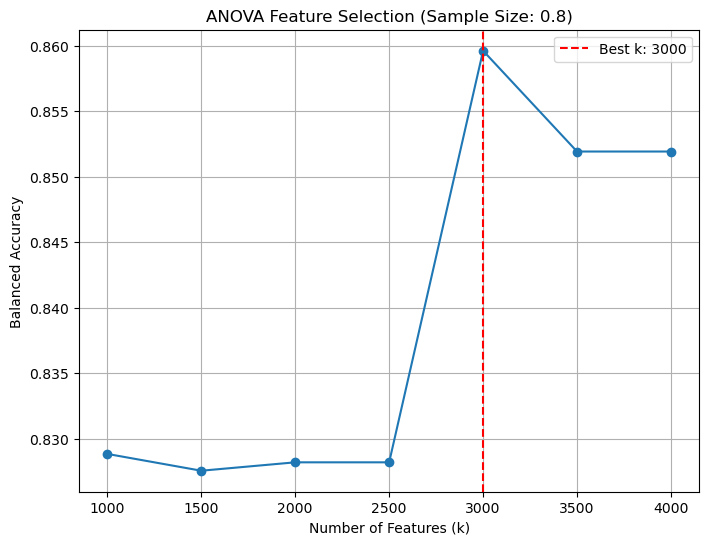


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.9062
  Balanced Accuracy = 0.9062


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
Random Forest:
  Accuracy = 0.9375
  Balanced Accuracy = 0.9375

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.9062
  Balanced Accuracy = 0.9062


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.9062
  Balanced Accuracy = 0.9062
Random Forest:
  Accuracy = 0.8438
  Balanced Accuracy = 0.8438

==================== RUN 3/3 ====================

=== ANOVA Feature Selection ===


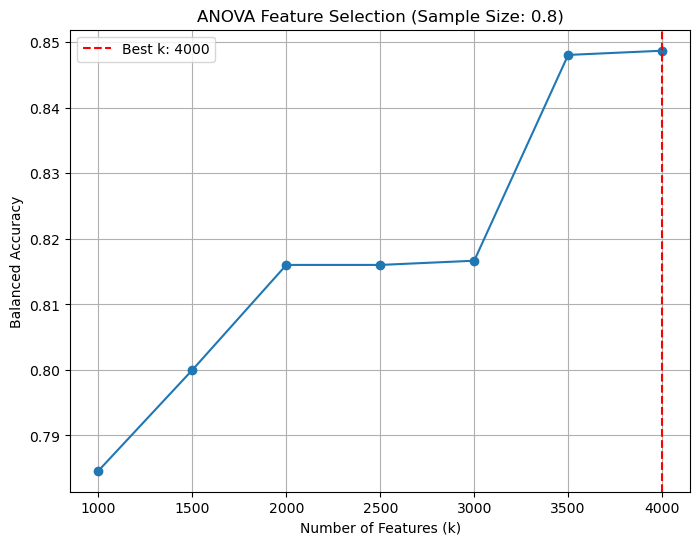


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125
Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8125
  Balanced Accuracy = 0.8125


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.8438
  Balanced Accuracy = 0.8438
Random Forest:
  Accuracy = 0.7188
  Balanced Accuracy = 0.7188

#################### SAMPLE SIZE: 0.5 ####################

==================== RUN 1/3 ====================

=== ANOVA Feature Selection ===


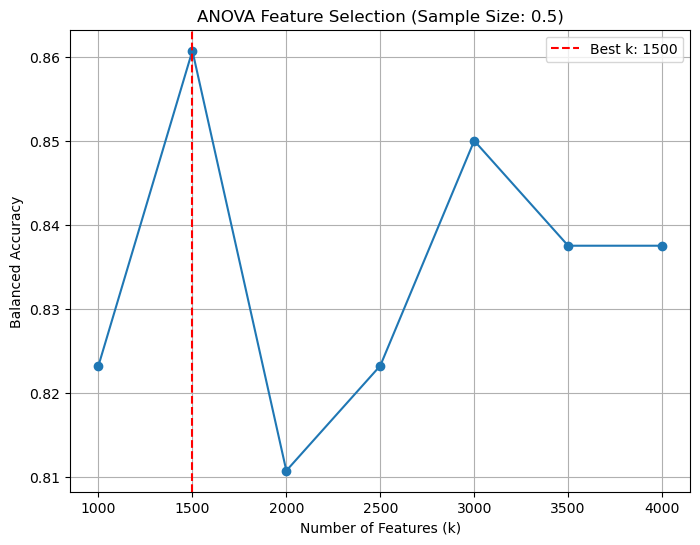


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7000
  Balanced Accuracy = 0.7000
SVM:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.6500
  Balanced Accuracy = 0.6500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.6500
  Balanced Accuracy = 0.6500

==================== RUN 2/3 ====================

=== ANOVA Feature Selection ===


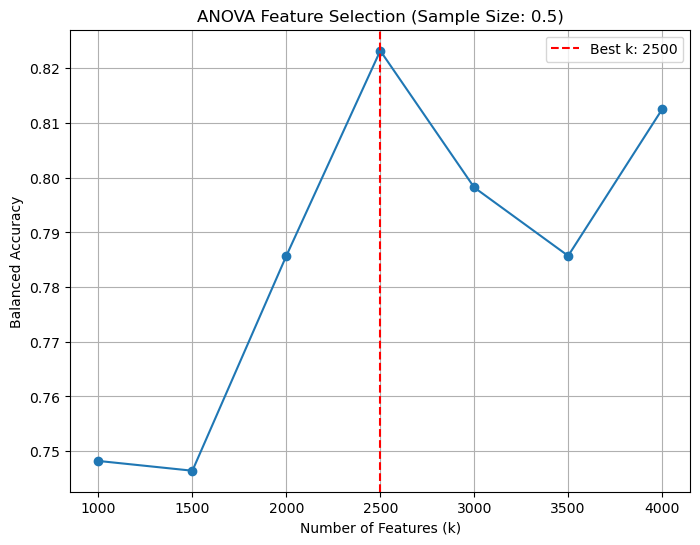


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
Random Forest:
  Accuracy = 0.7000
  Balanced Accuracy = 0.7000

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500

==================== RUN 3/3 ====================

=== ANOVA Feature Selection ===


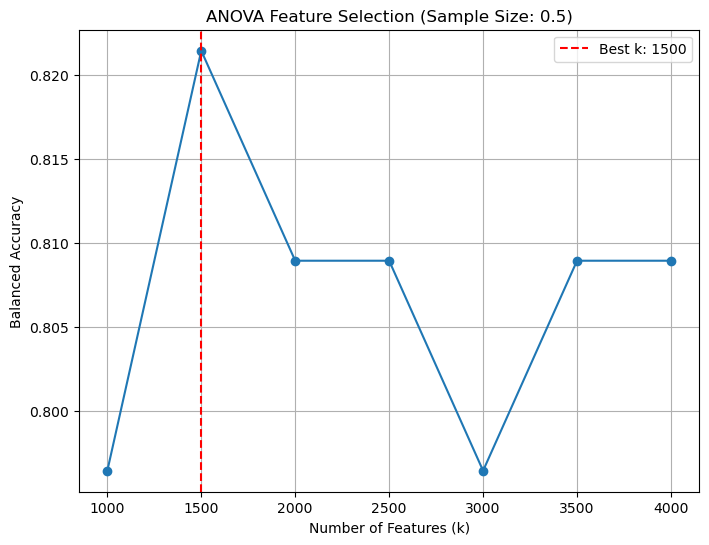


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
Random Forest:
  Accuracy = 0.9000
  Balanced Accuracy = 0.9000

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
SVM:
  Accuracy = 0.8000
  Balanced Accuracy = 0.8000


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.8500
  Balanced Accuracy = 0.8500

#################### SAMPLE SIZE: 0.2 ####################

==================== RUN 1/3 ====================

=== ANOVA Feature Selection ===


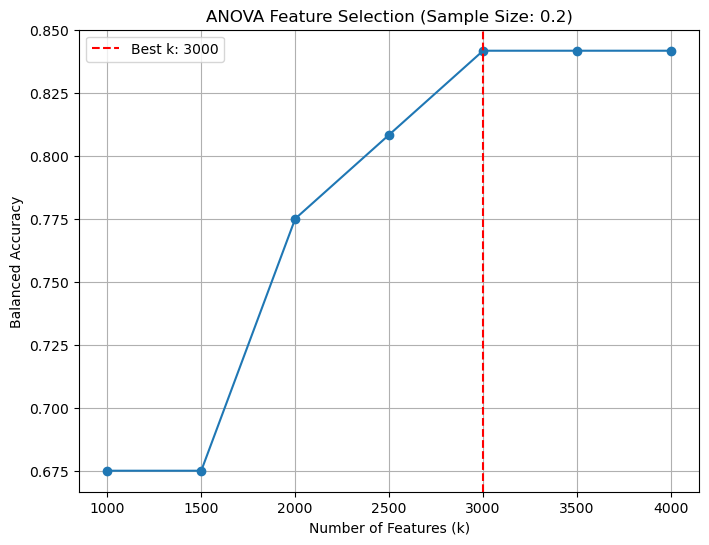


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000
SVM:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000
SVM:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000
Random Forest:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000

==================== RUN 2/3 ====================

=== ANOVA Feature Selection ===


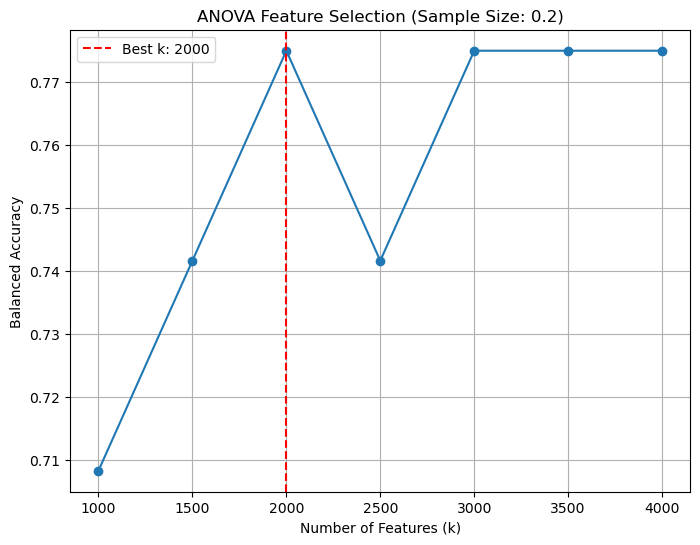


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750
Random Forest:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750

==================== RUN 3/3 ====================

=== ANOVA Feature Selection ===


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


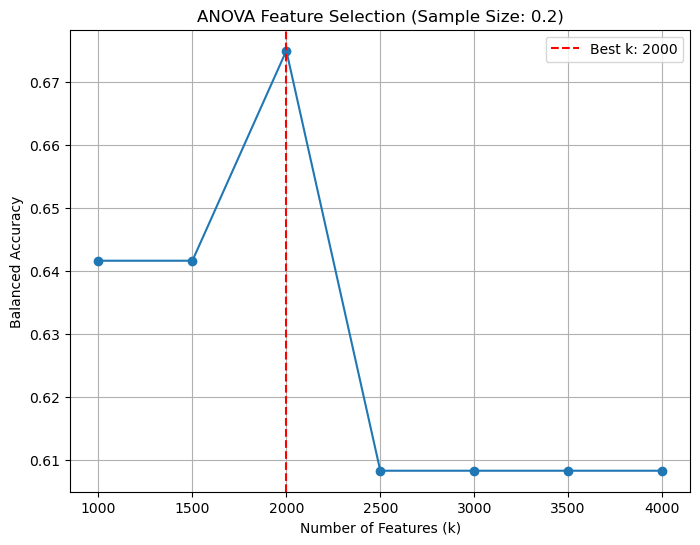


=== Lasso Feature Selection ===

--- ANOVA Selected Features ---
Logistic Regression:
  Accuracy = 1.0000
  Balanced Accuracy = 1.0000
SVM:
  Accuracy = 0.8750
  Balanced Accuracy = 0.8750


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Random Forest:
  Accuracy = 0.6250
  Balanced Accuracy = 0.6250

--- Lasso Selected Features ---
Logistic Regression:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
SVM:
  Accuracy = 0.7500
  Balanced Accuracy = 0.7500
Random Forest:
  Accuracy = 0.6250
  Balanced Accuracy = 0.6250

=== Feature Selection Heatmaps for Sample Size 0.8 ===


d:\Softwares\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


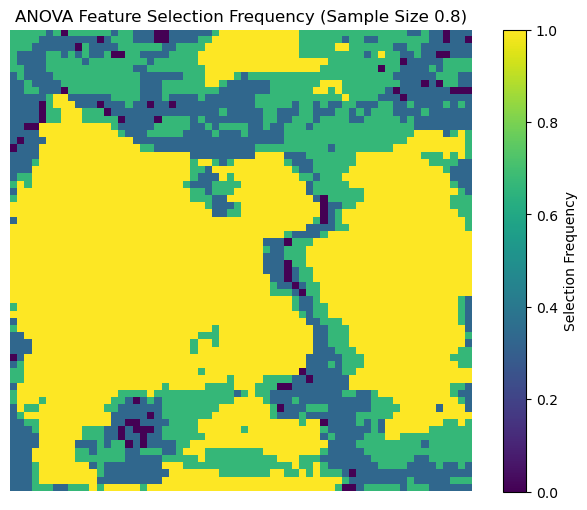

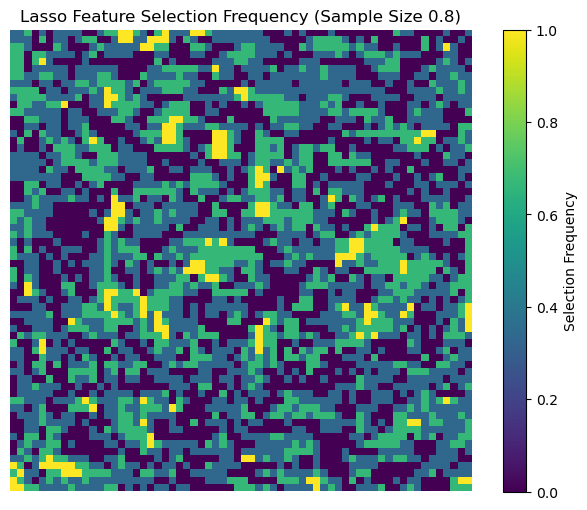

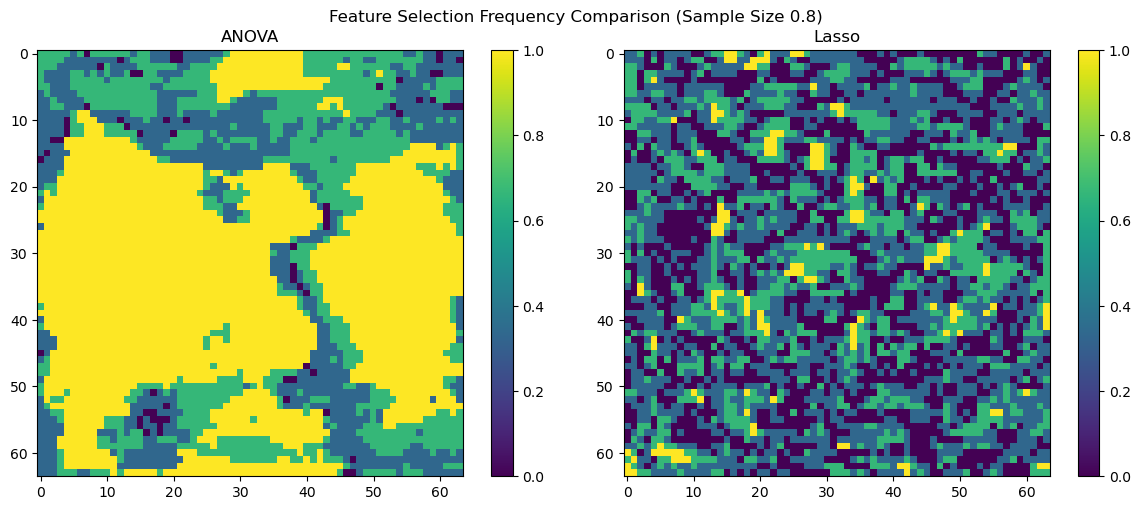


=== Feature Selection Heatmaps for Sample Size 0.5 ===


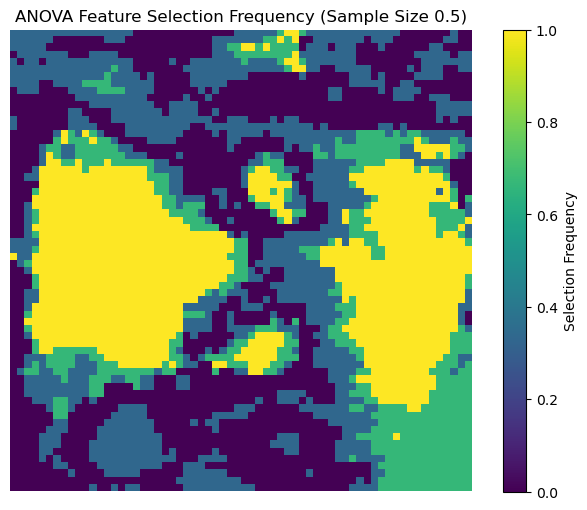

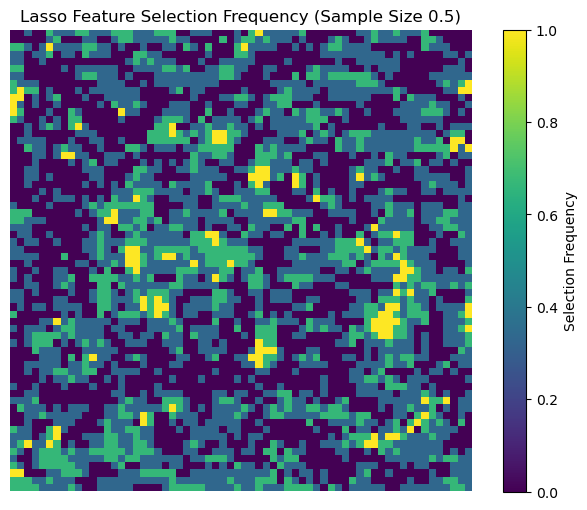

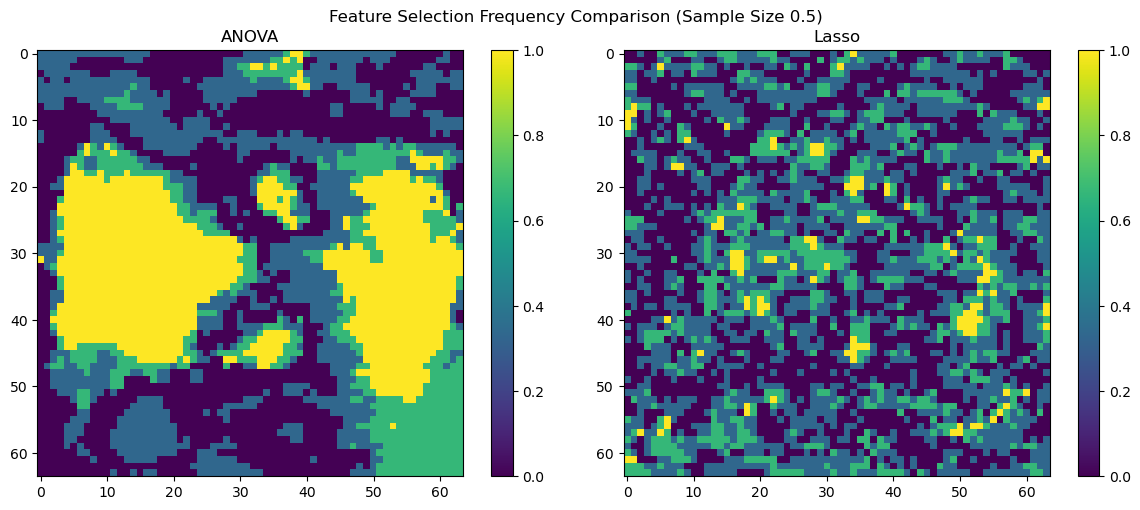


=== Feature Selection Heatmaps for Sample Size 0.2 ===


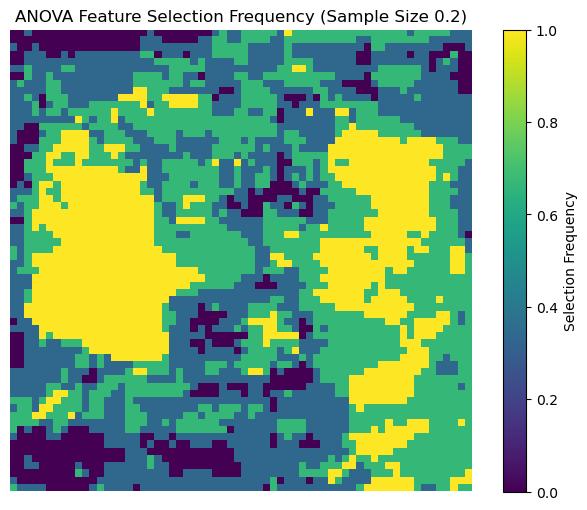

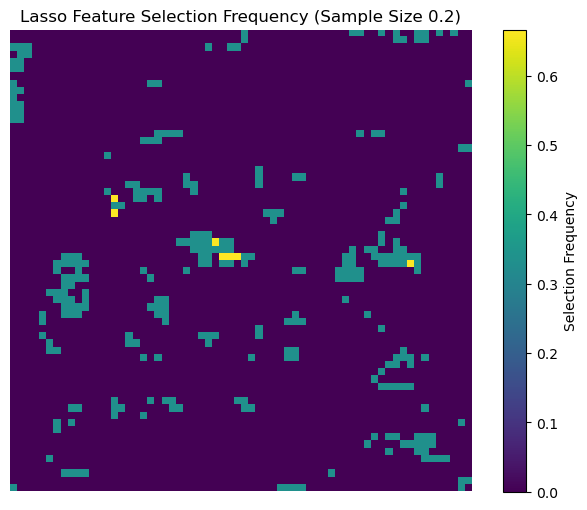

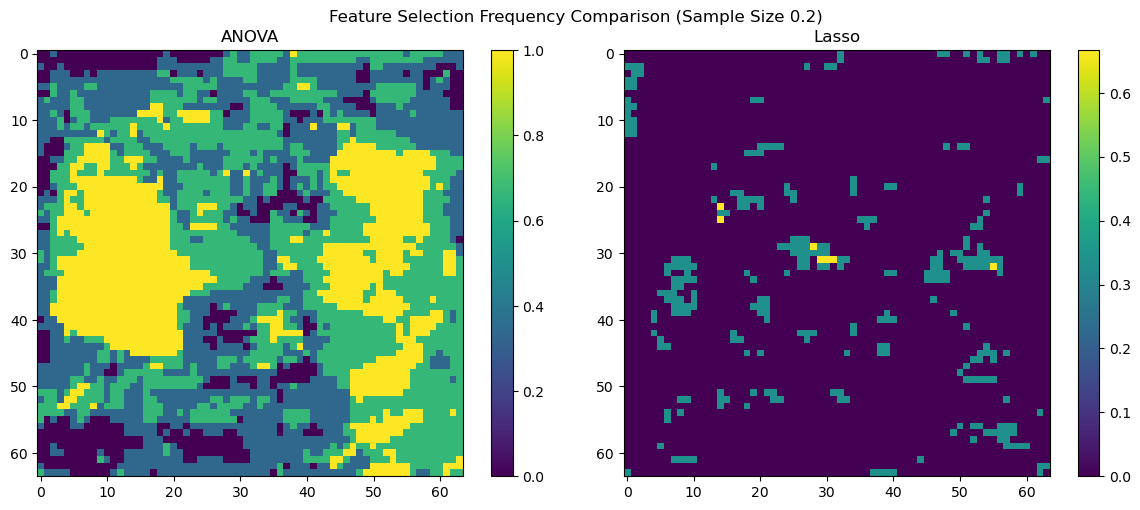


=== Performance Summary ===

----------------------------------------
Sample Size: 0.8
----------------------------------------

Classifier: Logistic Regression

Method: ANOVA
  Avg best k: 3166.7
  Accuracy: 0.8646 ± 0.0390
  Balanced Accuracy: 0.8646 ± 0.0390

Method: Lasso
  Avg best C: 6.7000
  Avg features: 1323.3
  Accuracy: 0.8333 ± 0.0531
  Balanced Accuracy: 0.8333 ± 0.0531

Classifier: SVM

Method: ANOVA
  Avg best k: 3166.7
  Accuracy: 0.8438 ± 0.0255
  Balanced Accuracy: 0.8438 ± 0.0255

Method: Lasso
  Avg best C: 6.7000
  Avg features: 1323.3
  Accuracy: 0.8542 ± 0.0390
  Balanced Accuracy: 0.8542 ± 0.0390

Classifier: Random Forest

Method: ANOVA
  Avg best k: 3166.7
  Accuracy: 0.7917 ± 0.1062
  Balanced Accuracy: 0.7917 ± 0.1062

Method: Lasso
  Avg best C: 6.7000
  Avg features: 1323.3
  Accuracy: 0.7604 ± 0.0589
  Balanced Accuracy: 0.7604 ± 0.0589

----------------------------------------
Sample Size: 0.5
----------------------------------------

Classifier: Logist

In [11]:
# --- Configuration ---
N_RUNS = 3                   # Number of experimental runs
K_VALUES = np.arange(1000, 4096, 500)    # Values of k to test for ANOVA
TEST_SIZE = 0.2              # Test set size
IMG_SHAPE = (64, 64)         # Assuming 16x16 images (256 features)
SAMPLE_SIZES = [0.8, 0.5, 0.2]  # Fractions of full dataset to test

# --- Classifiers ---
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(penalty='l1', loss='squared_hinge', dual=False, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# --- Feature Selection Frequency Tracking ---
feature_selection_freq = {
    sample_size: {
        'ANOVA': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1]),
        'Lasso': np.zeros(IMG_SHAPE[0] * IMG_SHAPE[1])
    }
    for sample_size in SAMPLE_SIZES
}

# --- Classifier Performance Results ---
results = {}
for clf_name in classifiers:
    results[clf_name] = {
        sample_size: {
            'ANOVA': {
                'best_k': [],
                'test_accuracies': [],
                'test_balanced_accuracy': []
            },
            'Lasso': {
                'best_C': [],
                'num_features': [],
                'test_accuracies': [],
                'test_balanced_accuracy': []
            }
        }
        for sample_size in SAMPLE_SIZES
    }

# --- Main Experiment ---
for sample_size in SAMPLE_SIZES:
    print(f"\n{'#'*20} SAMPLE SIZE: {sample_size} {'#'*20}")
    
    for run in range(N_RUNS):
        print(f"\n{'='*20} RUN {run+1}/{N_RUNS} {'='*20}")
        random_state = run * 42
        
        # Data splitting: first take a subset of the full dataset
        subset_images, _, subset_labels, _ = train_test_split(
            catdog, labels_cd, 
            train_size=sample_size, 
            stratify=labels_cd, 
            random_state=random_state)
        
        # Split subset into train and test
        X_train, X_test, y_train, y_test = train_test_split(
            subset_images, subset_labels, 
            test_size=TEST_SIZE, 
            random_state=random_state, 
            stratify=subset_labels)
        
        # Pipeline: Feature scaling and selection
        pipeline = Pipeline([
            ('scaler', MinMaxScaler()),
            ('selector', SelectKBest(f_classif)),
            ('clf', LogisticRegression(solver='liblinear', max_iter=500))
        ])
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

        # === ANOVA Feature Selection ===
        print("\n=== ANOVA Feature Selection ===")
        param_grid = {'selector__k': K_VALUES}
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='balanced_accuracy')
        grid_search.fit(X_train, y_train)
        
        best_k = grid_search.best_params_['selector__k']
        best_selector = SelectKBest(score_func=f_classif, k=best_k)
        X_train_selected = best_selector.fit_transform(X_train, y_train)
        X_test_selected = best_selector.transform(X_test)
        selected_indices = best_selector.get_support(indices=True)
        
        # Update ANOVA feature frequency
        feature_selection_freq[sample_size]['ANOVA'][selected_indices] += 1/N_RUNS

        # Plot ANOVA results
        plt.figure(figsize=(8, 6))
        plt.plot(K_VALUES, grid_search.cv_results_['mean_test_score'], marker='o')
        plt.title(f"ANOVA Feature Selection (Sample Size: {sample_size})")
        plt.xlabel("Number of Features (k)")
        plt.ylabel("Balanced Accuracy")
        plt.xticks(K_VALUES)
        plt.grid()
        plt.axvline(x=best_k, color='r', linestyle='--', label=f"Best k: {best_k}")
        plt.legend()
        plt.show()
        
        # === Lasso Feature Selection ===
        print("\n=== Lasso Feature Selection ===")
        lasso_pipeline = Pipeline([
            ('classifier', LogisticRegression(
                penalty='l1', solver='liblinear', 
                max_iter=200, random_state=random_state))
        ])
        grid_search = GridSearchCV(
            lasso_pipeline, 
            {'classifier__C': np.logspace(-3, 1, 7)}, 
            cv=cv, 
            scoring='balanced_accuracy',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        
        best_C = grid_search.best_params_['classifier__C']
        best_lasso = grid_search.best_estimator_.named_steps['classifier']
        selected_indices = np.where(np.abs(best_lasso.coef_).sum(axis=0) > 1e-6)[0]
        num_selected = len(selected_indices)
        
        # Update Lasso feature frequency
        feature_selection_freq[sample_size]['Lasso'][selected_indices] += 1/N_RUNS
        
        # === Classifier Evaluation ===
        for method in ['ANOVA', 'Lasso']:
            print(f"\n--- {method} Selected Features ---")
            if method == 'ANOVA':
                X_train_sel = X_train_selected
                X_test_sel = X_test_selected
            else:
                X_train_sel = X_train[:, selected_indices]
                X_test_sel = X_test[:, selected_indices]
            
            for clf_name, clf in classifiers.items():
                clf.fit(X_train_sel, y_train)
                y_pred = clf.predict(X_test_sel)
                
                results[clf_name][sample_size][method]['test_accuracies'].append(
                    accuracy_score(y_test, y_pred))
                results[clf_name][sample_size][method]['test_balanced_accuracy'].append(
                    balanced_accuracy_score(y_test, y_pred))
                
                if method == 'ANOVA':
                    results[clf_name][sample_size][method]['best_k'].append(best_k)
                else:
                    results[clf_name][sample_size][method]['best_C'].append(best_C)
                    results[clf_name][sample_size][method]['num_features'].append(num_selected)
                
                print(f"{clf_name}:")
                print(f"  Accuracy = {accuracy_score(y_test, y_pred):.4f}")
                print(f"  Balanced Accuracy = {balanced_accuracy_score(y_test, y_pred):.4f}")

# === Visualizations ===
def plot_feature_heatmap(freq_array, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(freq_array.reshape(IMG_SHAPE), 
               cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Selection Frequency')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Feature selection heatmaps for each sample size
for sample_size in SAMPLE_SIZES:
    print(f"\n=== Feature Selection Heatmaps for Sample Size {sample_size} ===")
    
    # Individual heatmaps
    plot_feature_heatmap(
        feature_selection_freq[sample_size]['ANOVA'], 
        f"ANOVA Feature Selection Frequency (Sample Size {sample_size})"
    )
    plot_feature_heatmap(
        feature_selection_freq[sample_size]['Lasso'], 
        f"Lasso Feature Selection Frequency (Sample Size {sample_size})"
    )
    
    # Side-by-side comparison
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(feature_selection_freq[sample_size]['ANOVA'].reshape(IMG_SHAPE),
               cmap='viridis', interpolation='nearest')
    plt.title("ANOVA")
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.imshow(feature_selection_freq[sample_size]['Lasso'].reshape(IMG_SHAPE),
               cmap='viridis', interpolation='nearest')
    plt.title("Lasso")
    plt.colorbar()
    plt.suptitle(f"Feature Selection Frequency Comparison (Sample Size {sample_size})")
    plt.tight_layout()
    plt.show()

# === Performance Summary ===
print("\n=== Performance Summary ===")
for sample_size in SAMPLE_SIZES:
    print(f"\n{'-'*40}\nSample Size: {sample_size}\n{'-'*40}")
    for clf_name in classifiers:
        print(f"\nClassifier: {clf_name}")
        for method in ['ANOVA', 'Lasso']:
            print(f"\nMethod: {method}")
            if method == 'ANOVA':
                print(f"  Avg best k: {np.mean(results[clf_name][sample_size][method]['best_k']):.1f}")
            else:
                print(f"  Avg best C: {np.mean(results[clf_name][sample_size][method]['best_C']):.4f}")
                print(f"  Avg features: {np.mean(results[clf_name][sample_size][method]['num_features']):.1f}")
            
            print(f"  Accuracy: {np.mean(results[clf_name][sample_size][method]['test_accuracies']):.4f} ± {np.std(results[clf_name][sample_size][method]['test_accuracies']):.4f}")
            print(f"  Balanced Accuracy: {np.mean(results[clf_name][sample_size][method]['test_balanced_accuracy']):.4f} ± {np.std(results[clf_name][sample_size][method]['test_balanced_accuracy']):.4f}")